In [1]:
%matplotlib inline

import setGPU
import os, h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize

import glob

from plots import loadModel, plotX, plotY, plotZ, plotAxes

setGPU: Setting GPU to: 2


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
n_samples = 200

f = h5py.File('/bigdata/shared/HGCAL_data/single_particle/all_noPU.h5', 'r')
X = np.asarray(f['image'])
#X = X.squeeze()

In [10]:
energy = np.asarray(f['true_energy'])

In [11]:
energy.shape

(155145,)

In [ ]:
all_g_weight1 = '/nfshome/vitoriabp/hgcal_wgan/trial23/weights/generator_weights_epoch_*.h5'
gen_model1 = '/nfshome/vitoriabp/hgcal_wgan/trial23/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01_shuffle.json'

In [4]:
all_g_weight2 = '/nfshome/vitoriabp/hgcal_wgan/trial28/weights/generator_weights_epoch_*.h5'
gen_model2 = '/nfshome/vitoriabp/hgcal_wgan/trial28/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01.json'

In [8]:
#all_g_weight2 = '/nfshome/vitoriabp/hgcal_wgan/trial26/weights/generator_weights_epoch_*.h5'
#gen_model2 = '/nfshome/vitoriabp/hgcal_wgan/trial26/weights/generator_model_change_discriminator.json'

In [10]:
#plotAxes(X[0:199], all_g_weight1, gen_model1)

Using TensorFlow backend.


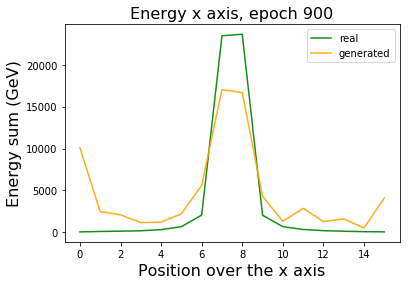

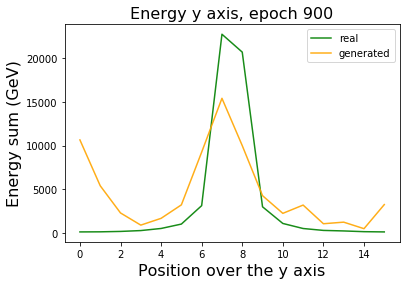

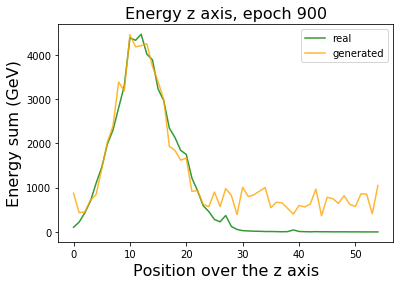

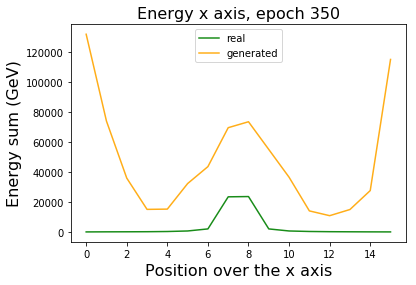

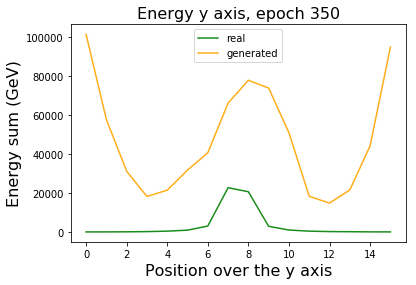

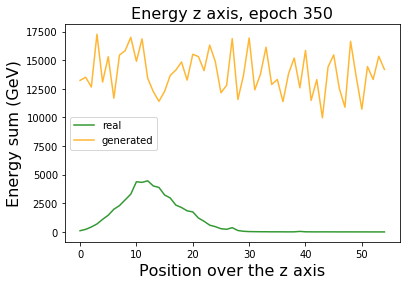

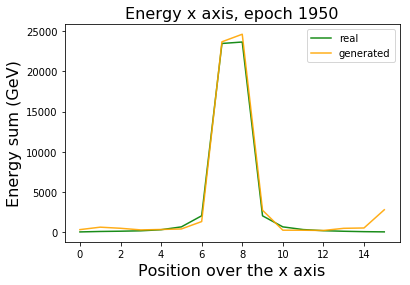

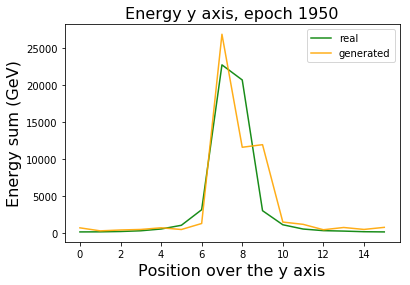

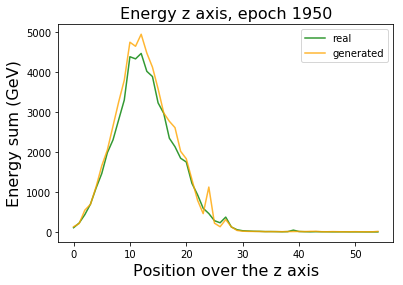

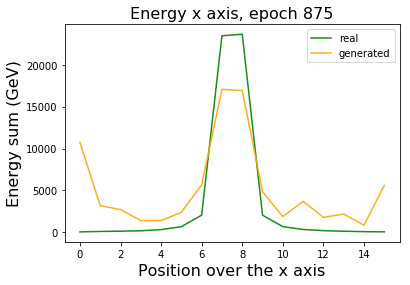

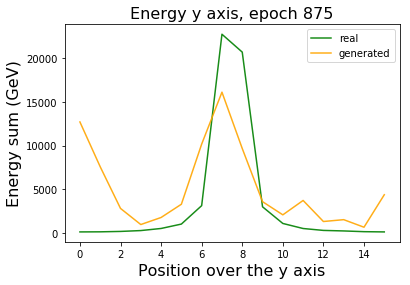

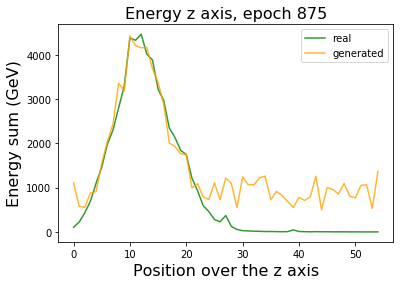

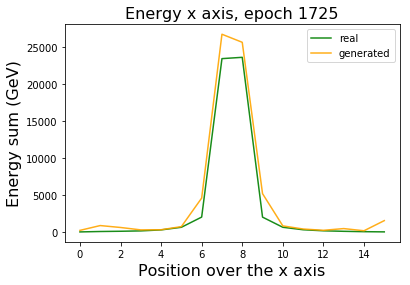

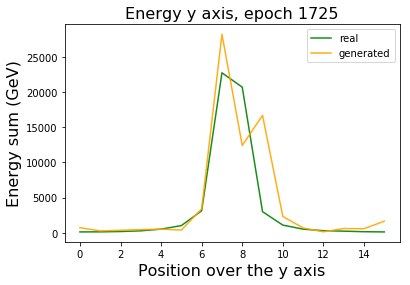

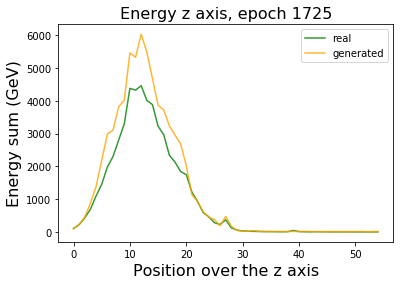

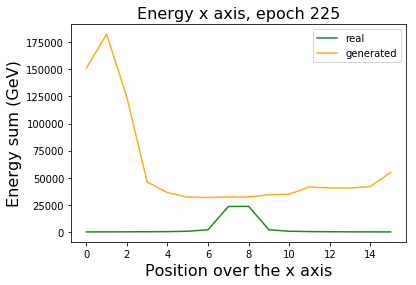

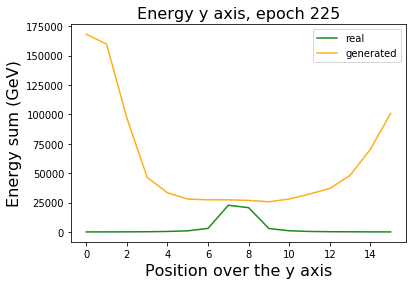

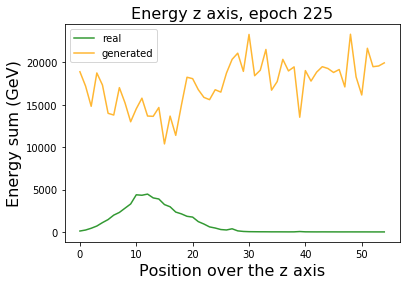

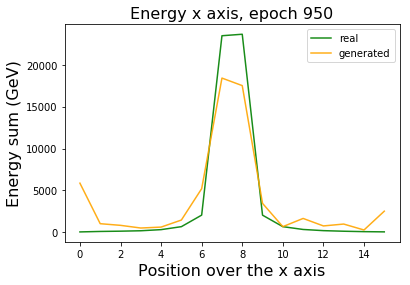

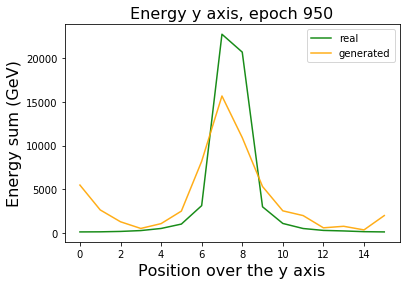

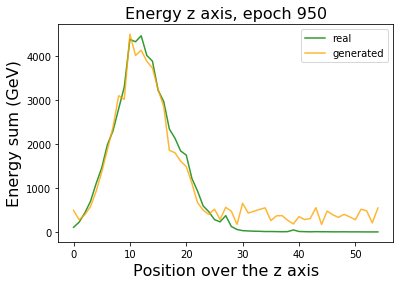

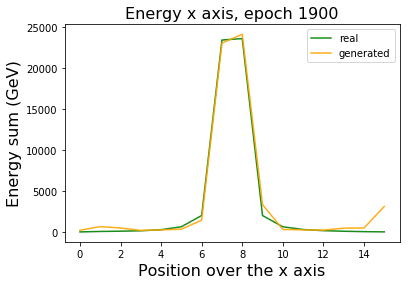

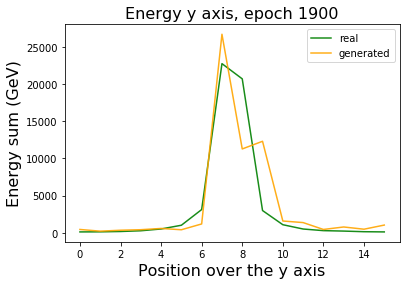

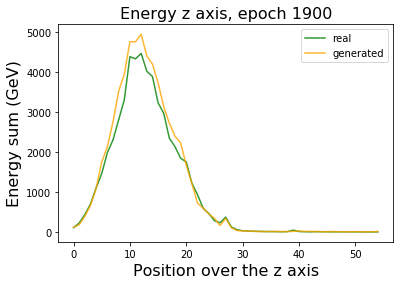

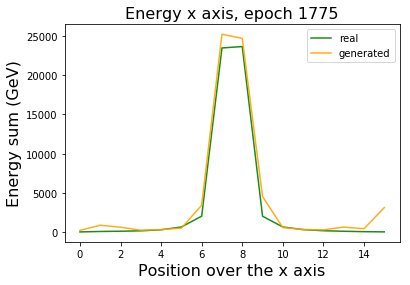

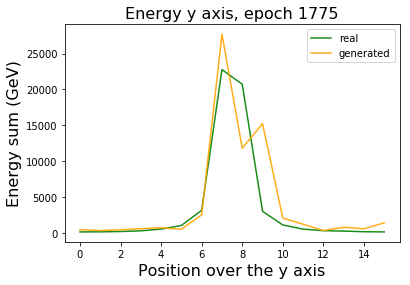

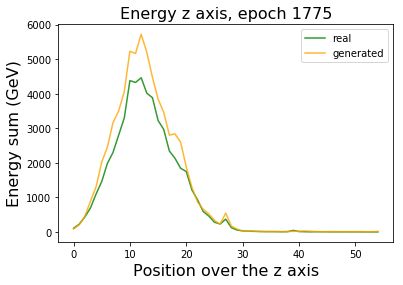

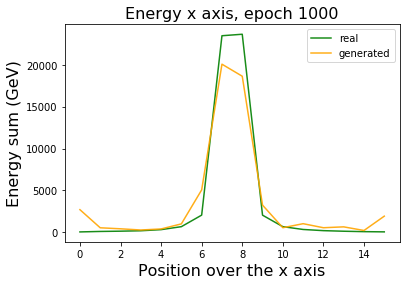

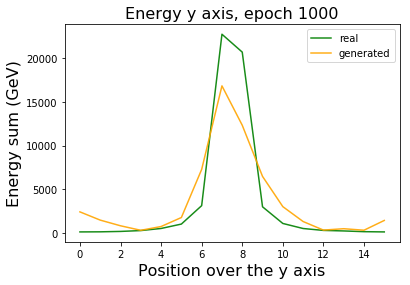

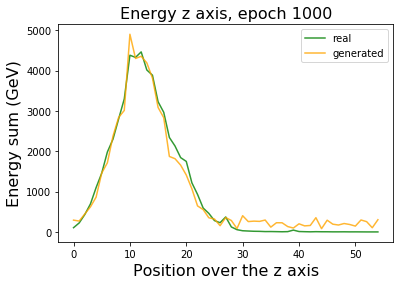

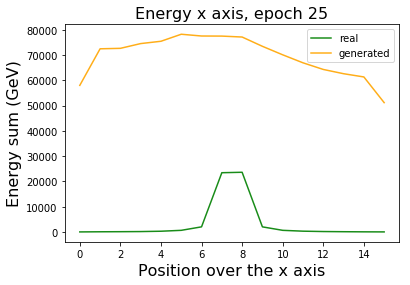

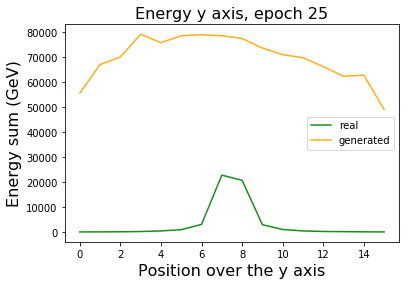

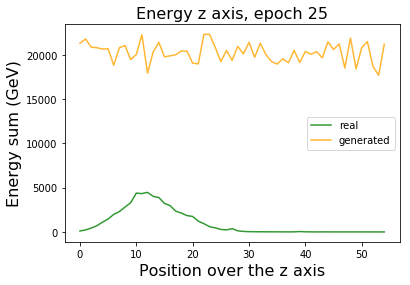

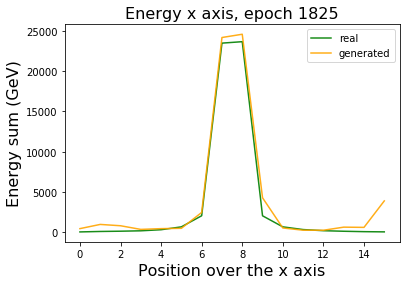

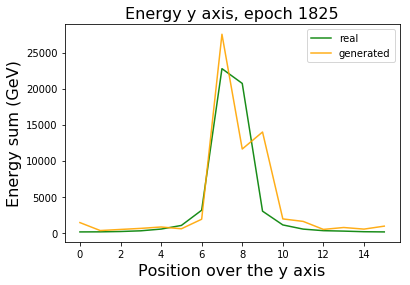

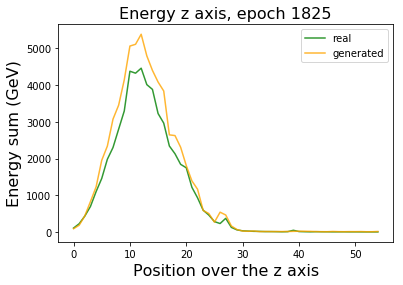

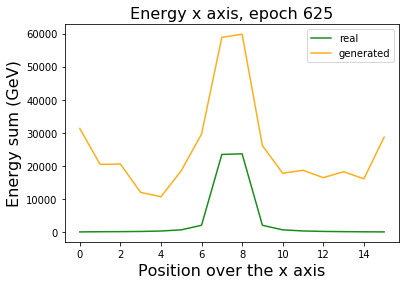

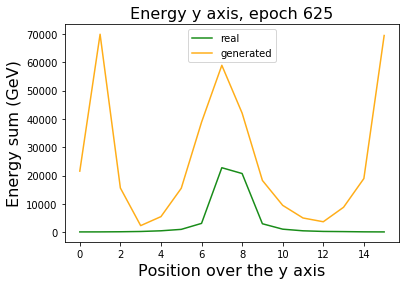

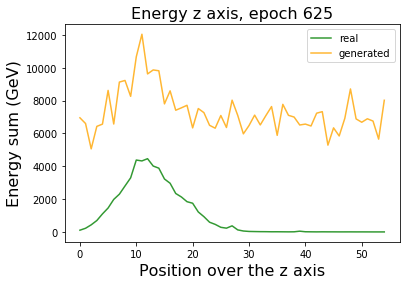

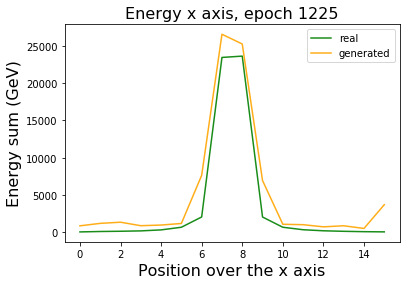

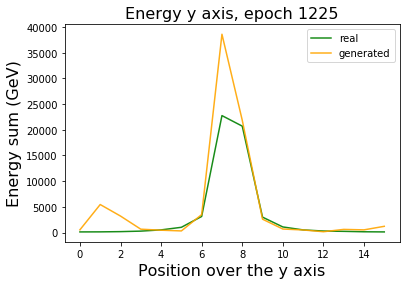

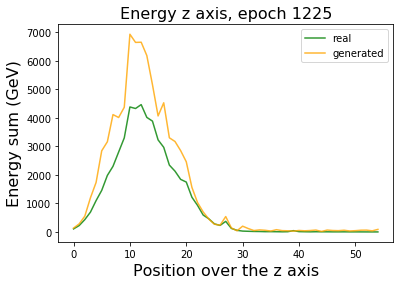

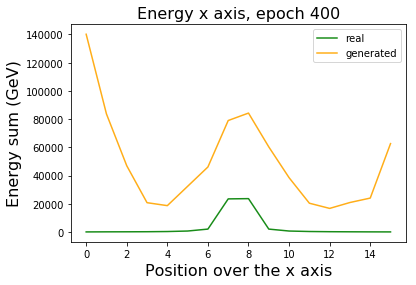

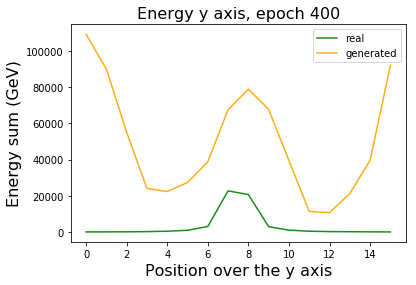

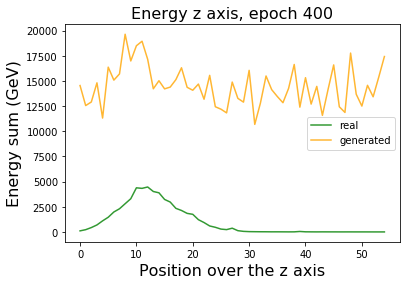

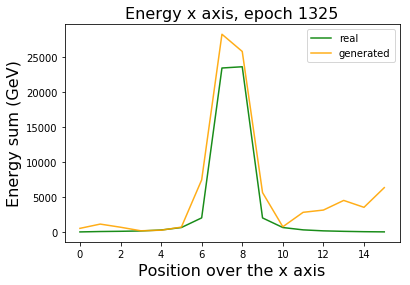

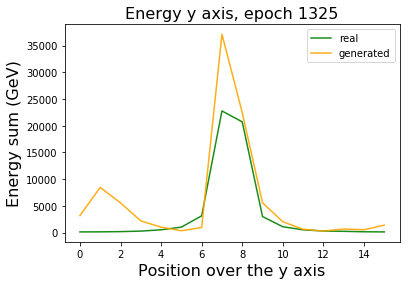

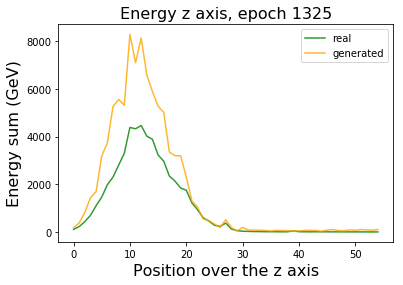

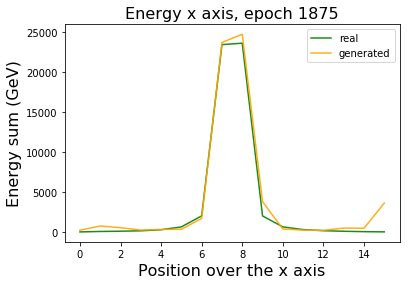

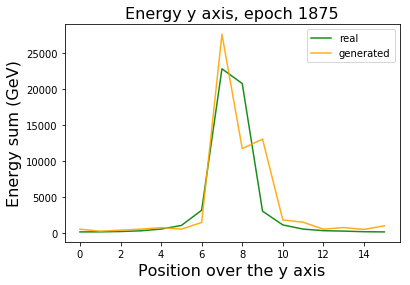

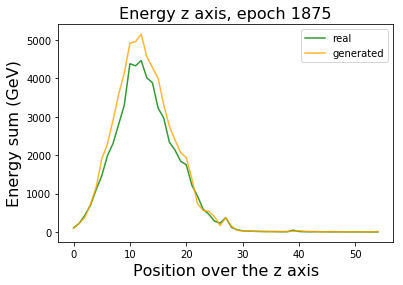

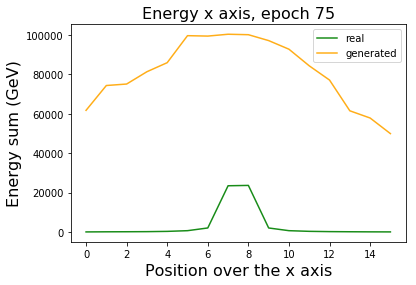

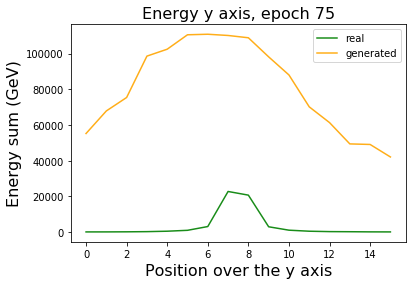

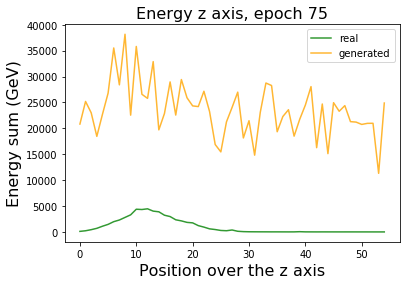

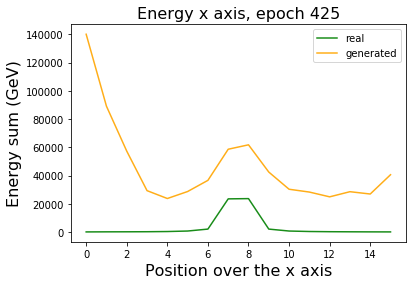

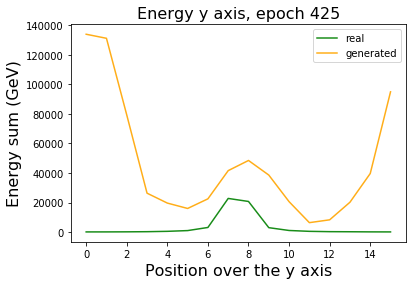

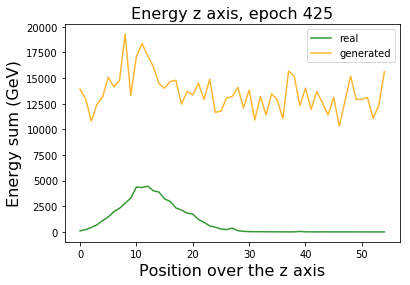

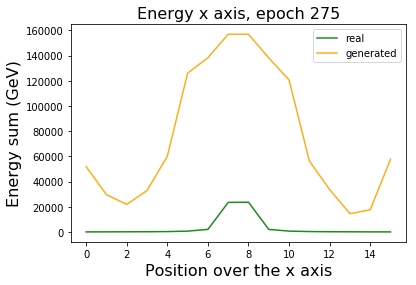

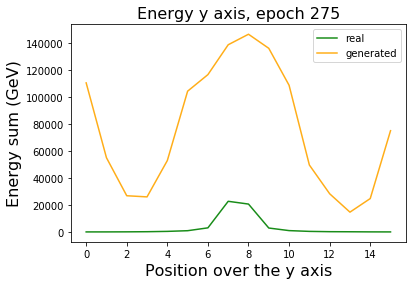

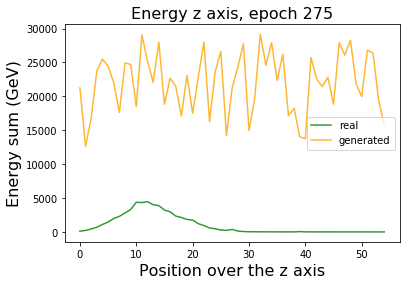

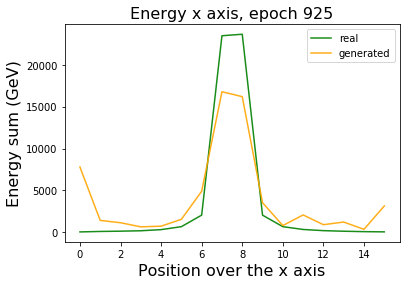

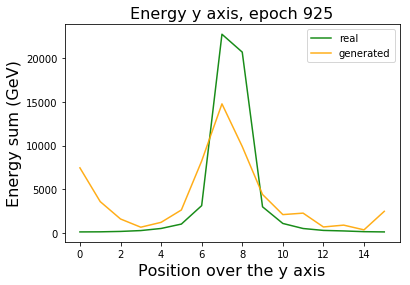

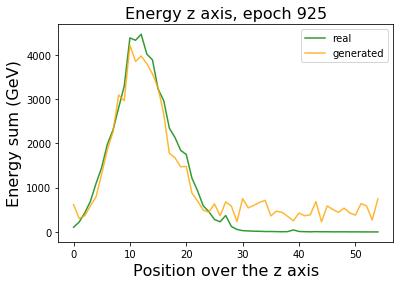

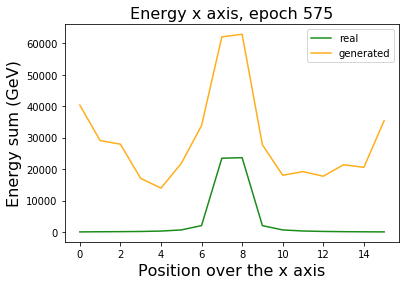

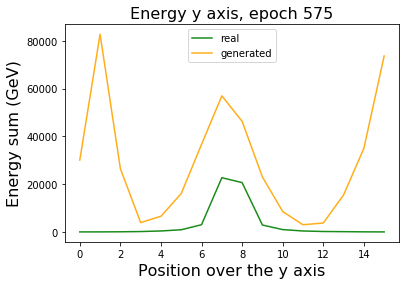

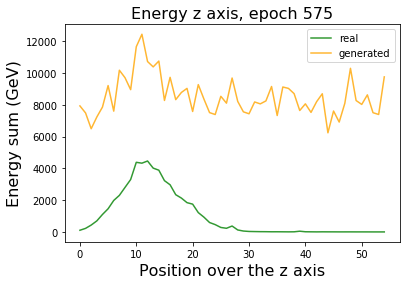

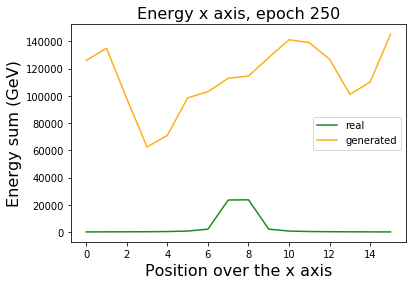

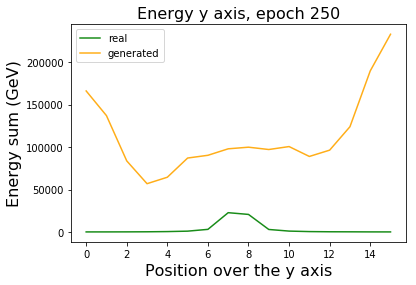

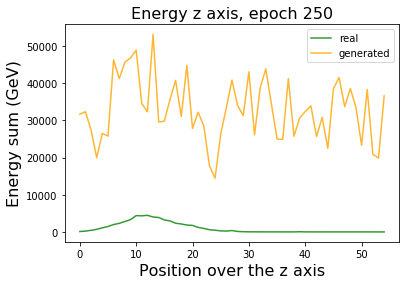

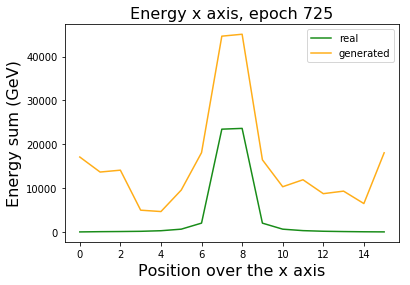

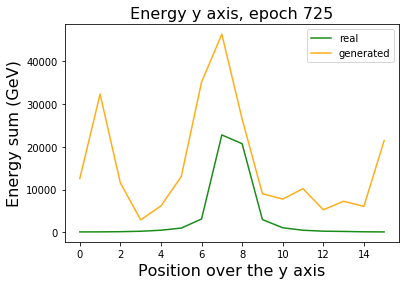

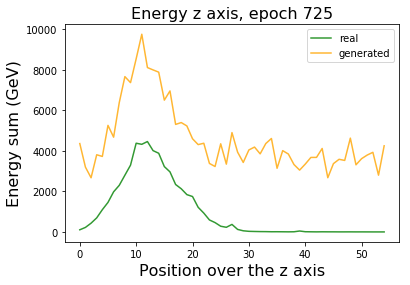

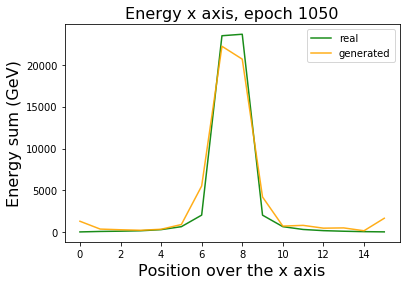

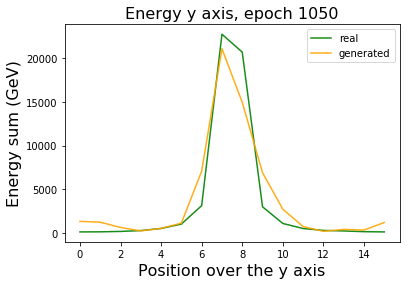

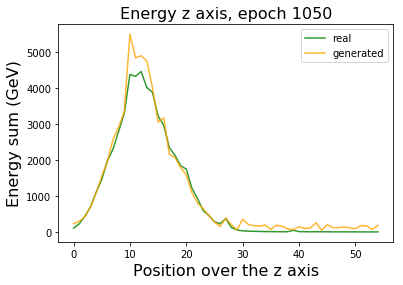

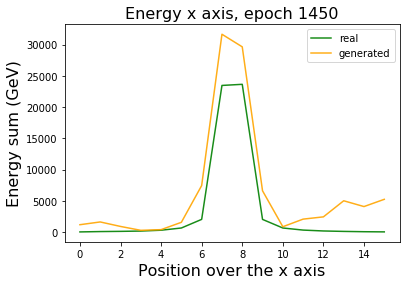

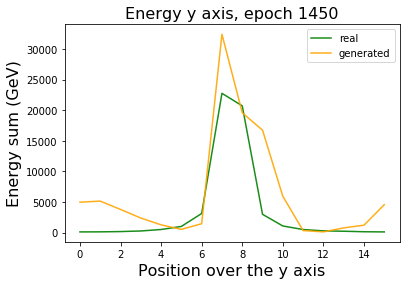

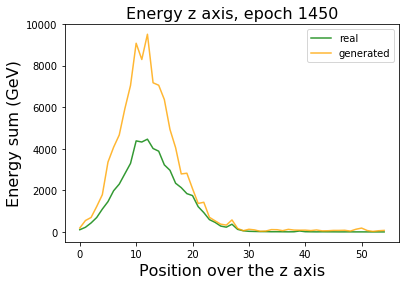

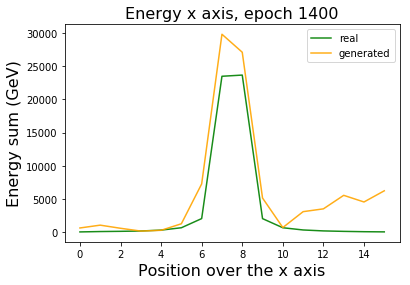

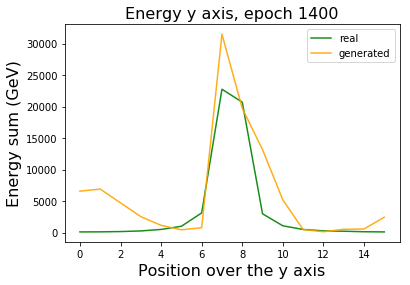

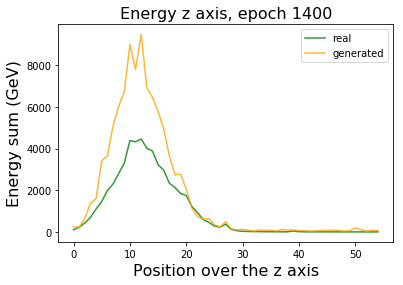

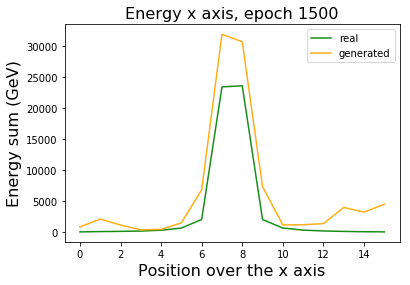

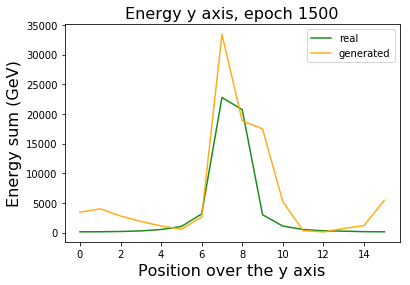

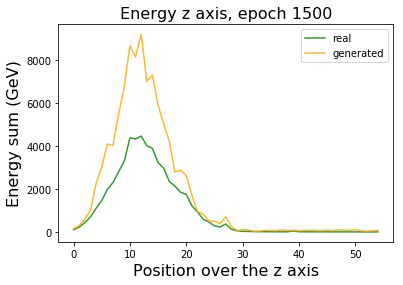

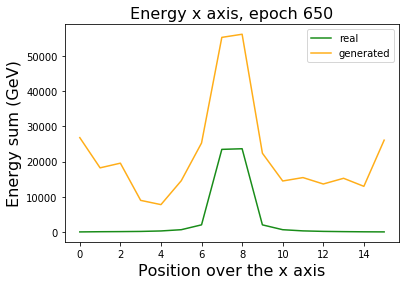

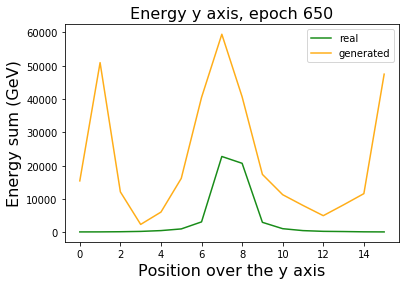

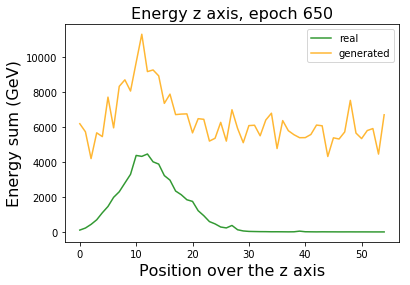

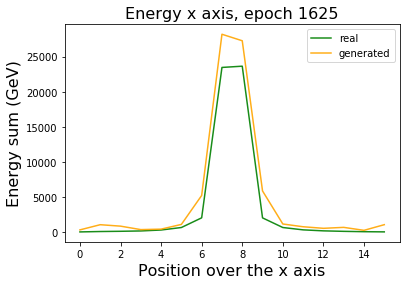

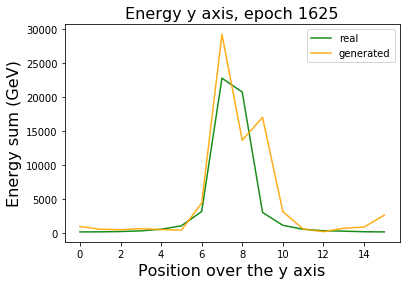

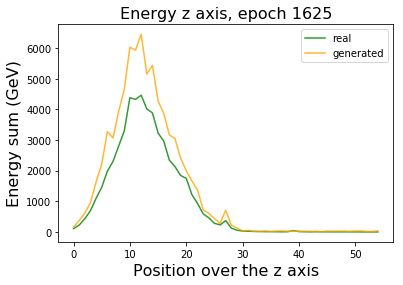

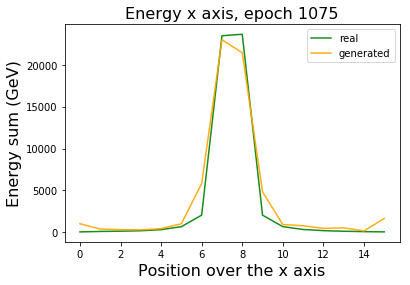

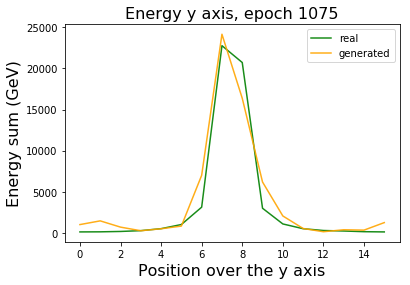

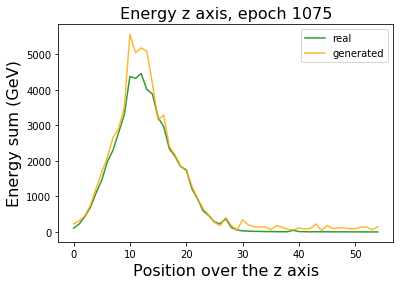

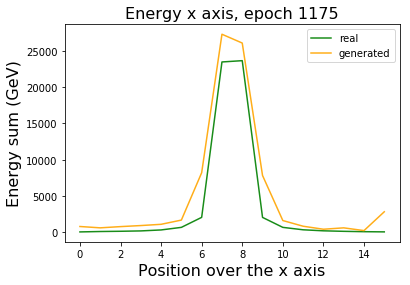

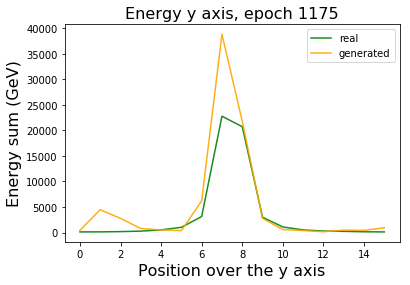

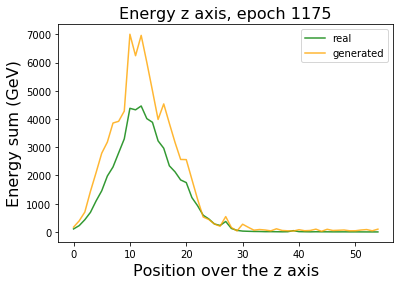

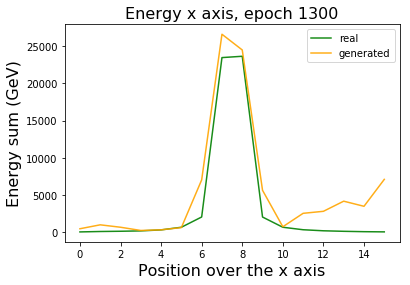

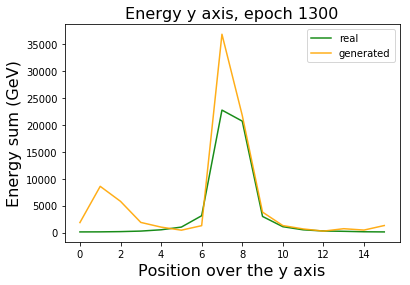

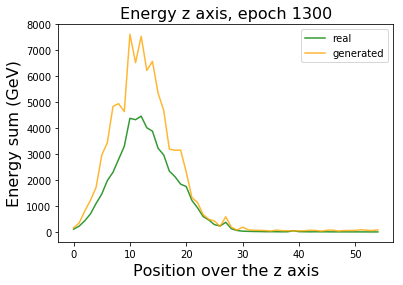

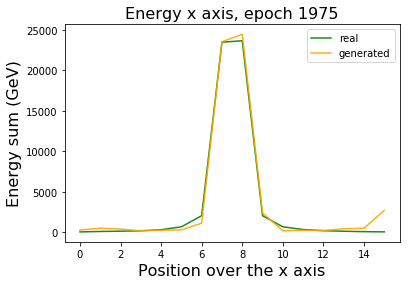

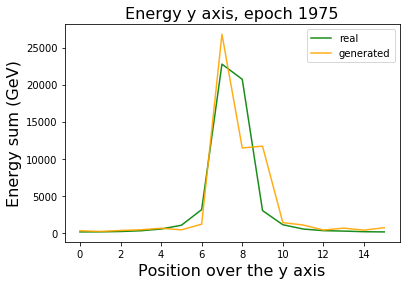

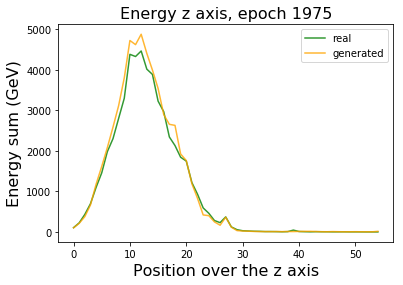

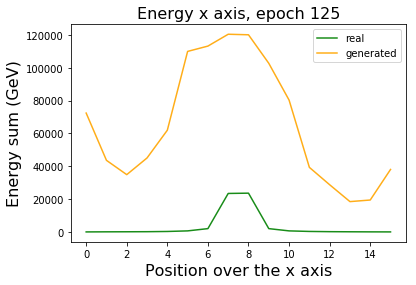

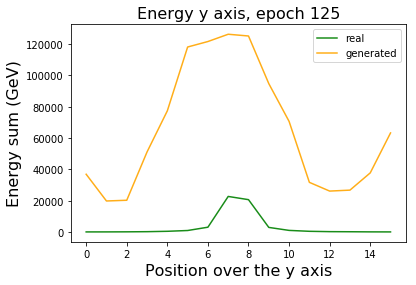

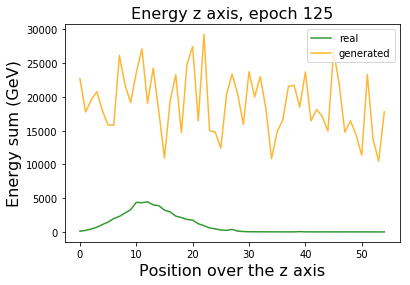

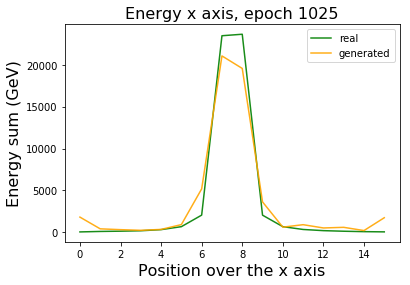

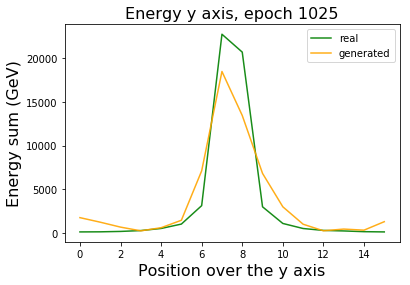

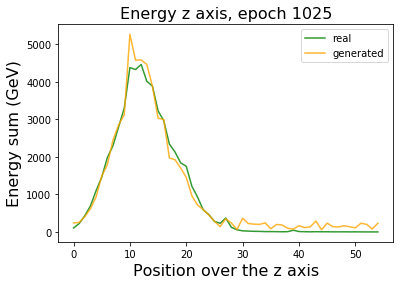

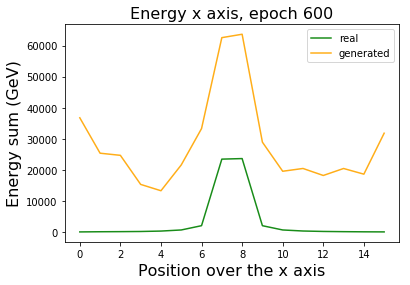

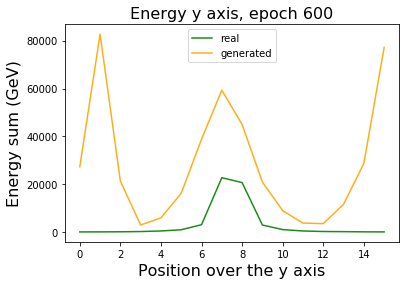

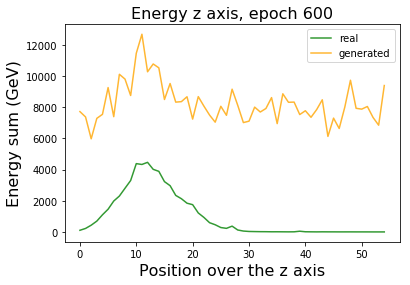

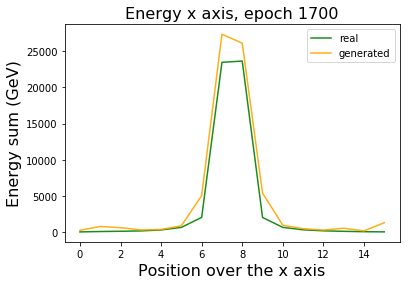

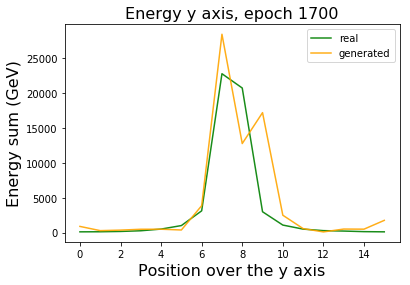

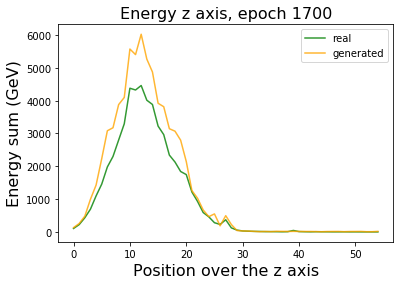

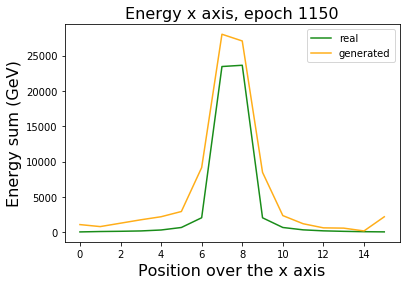

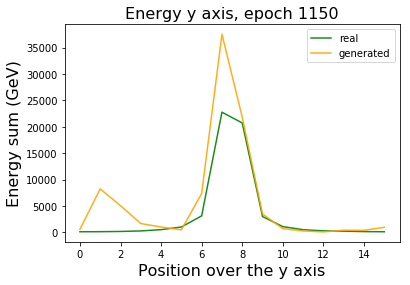

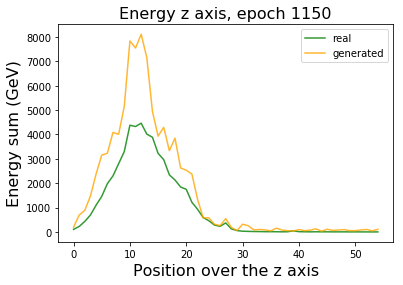

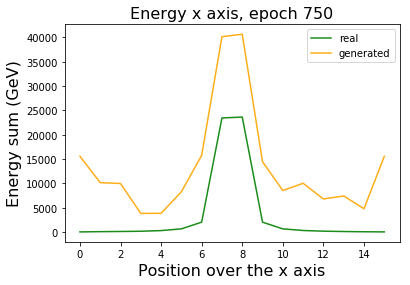

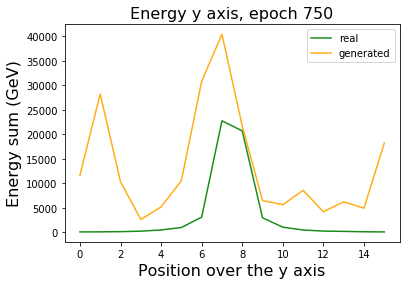

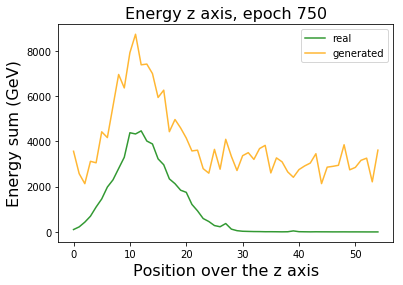

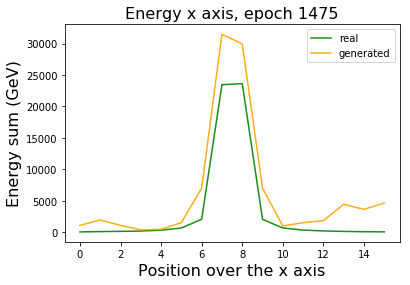

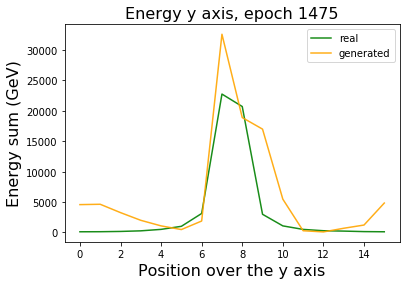

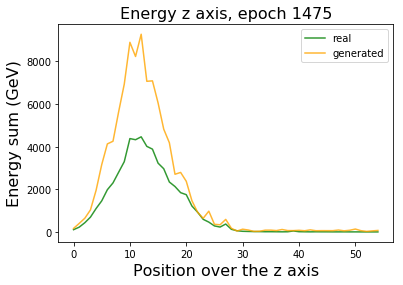

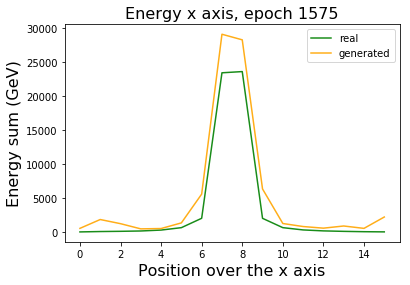

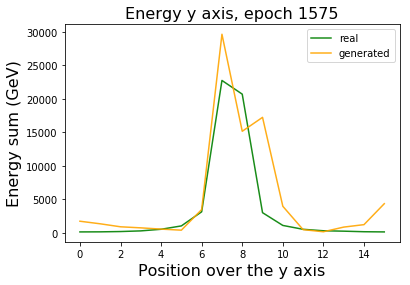

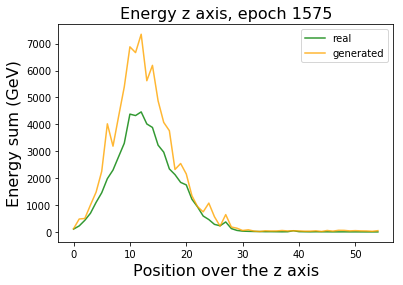

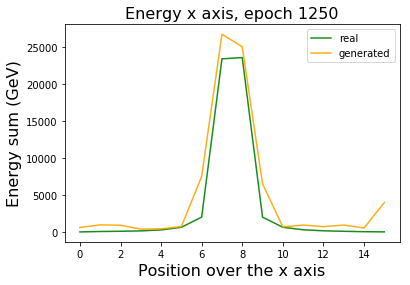

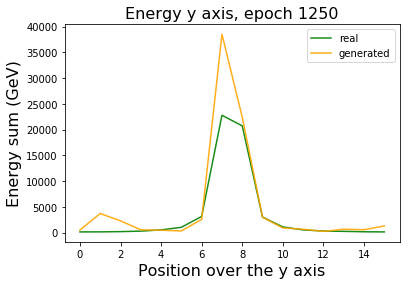

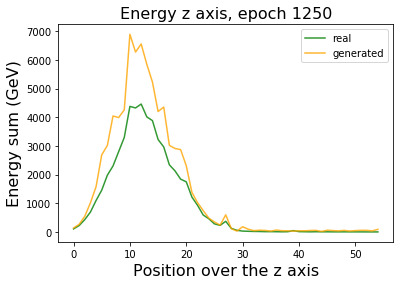

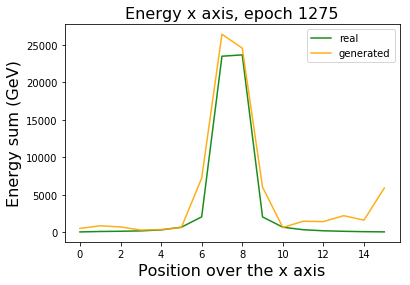

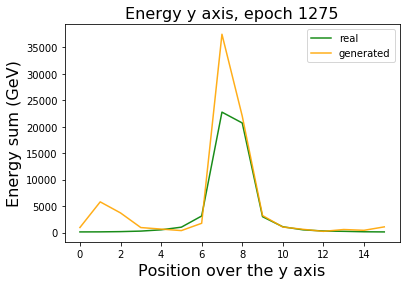

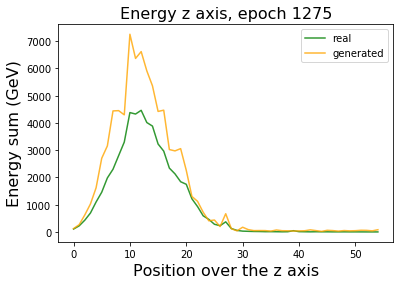

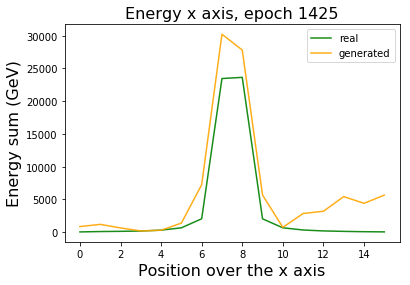

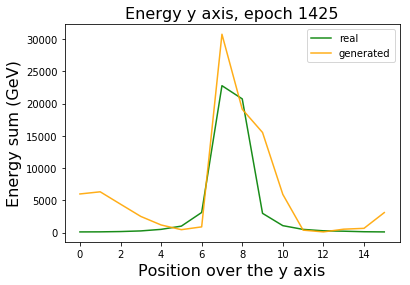

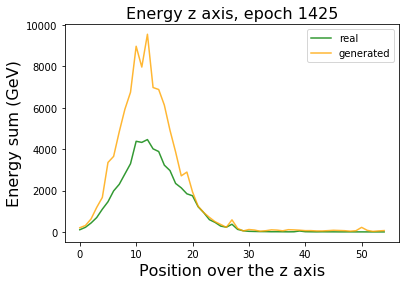

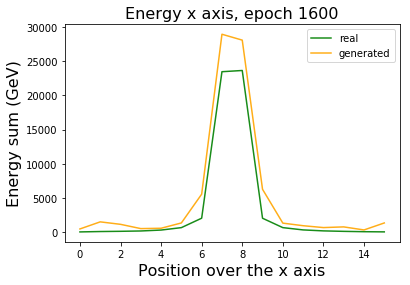

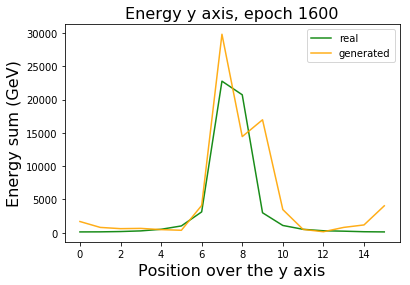

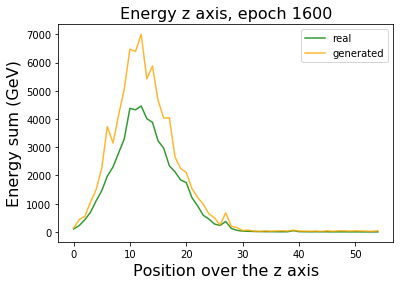

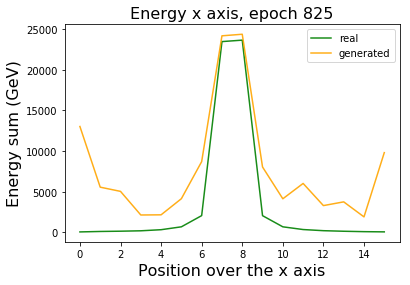

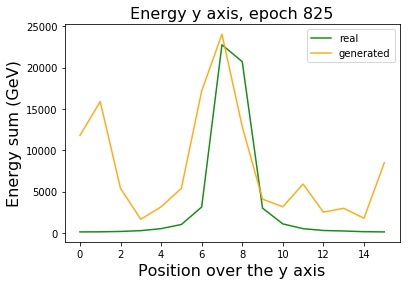

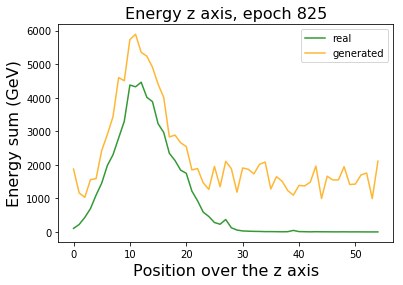

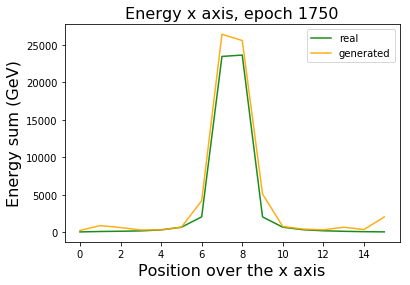

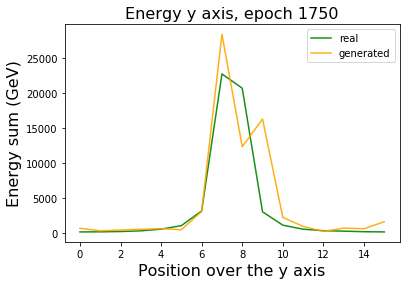

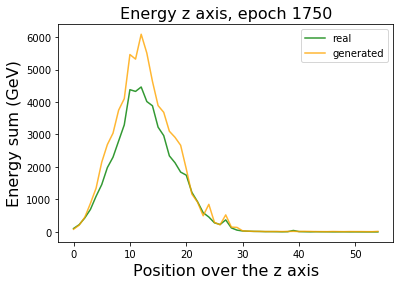

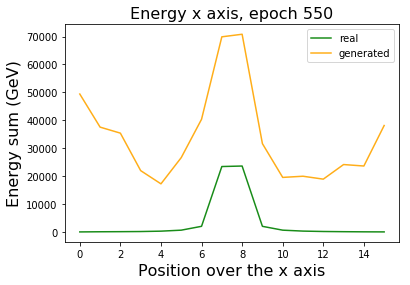

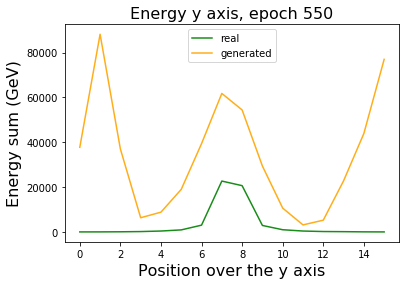

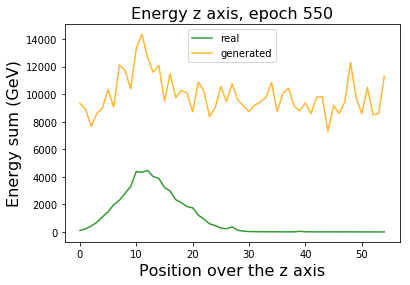

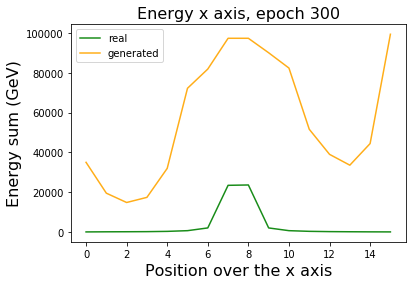

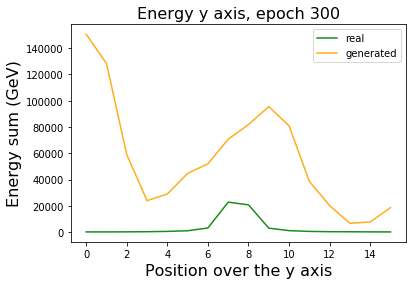

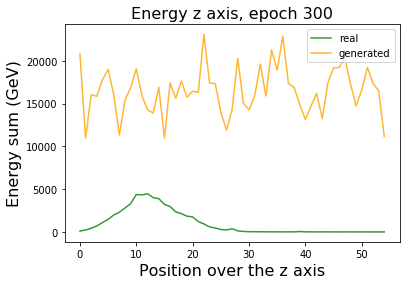

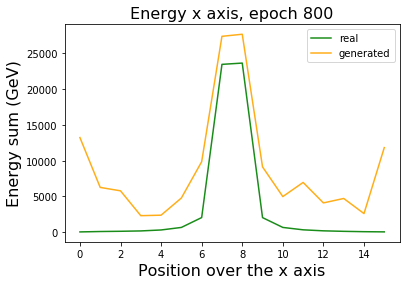

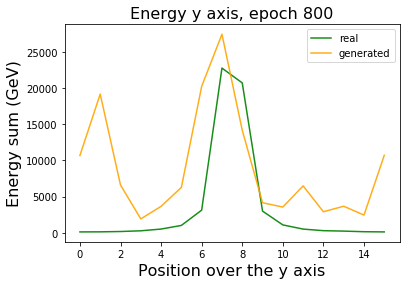

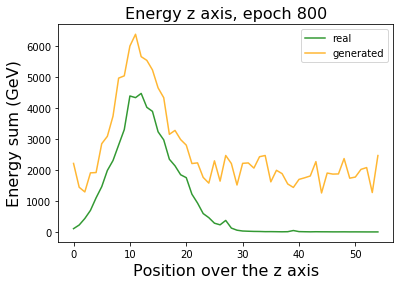

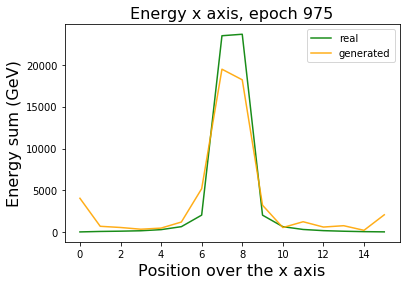

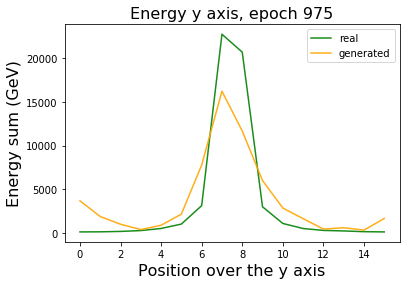

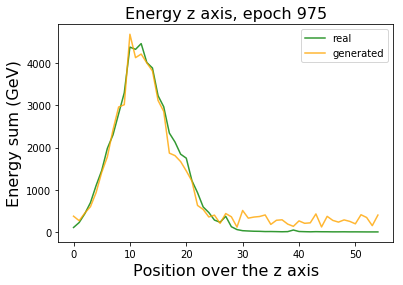

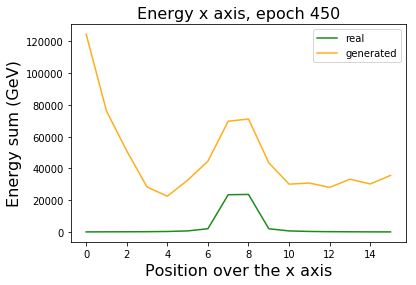

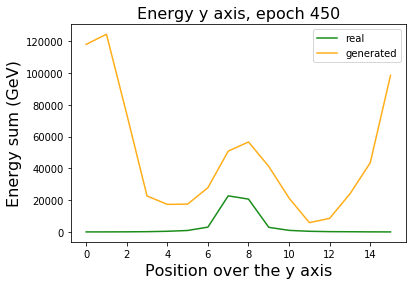

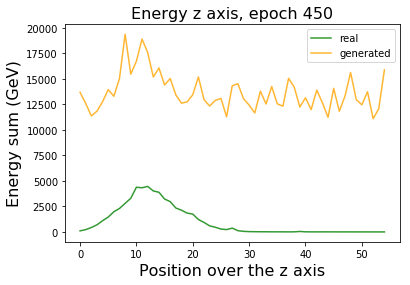

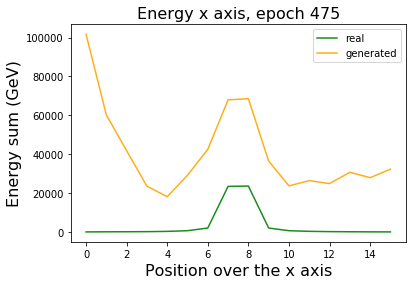

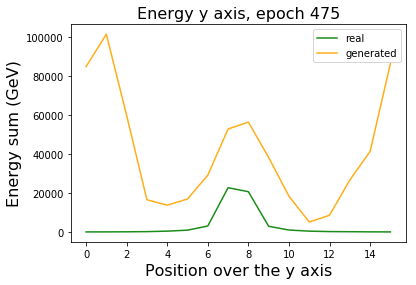

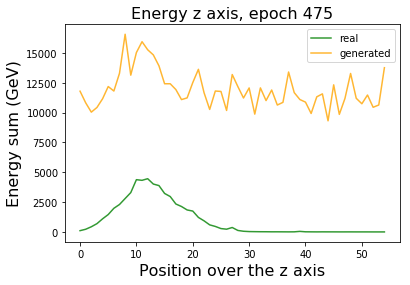

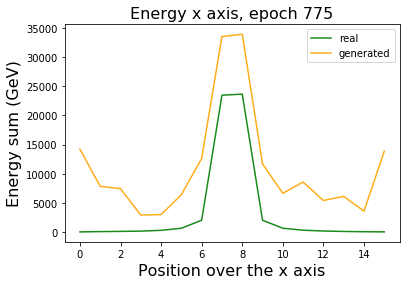

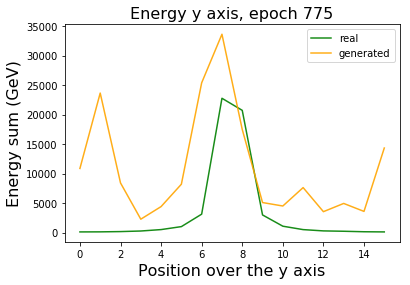

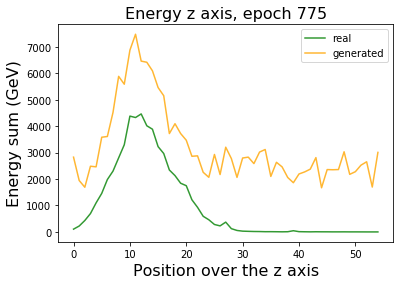

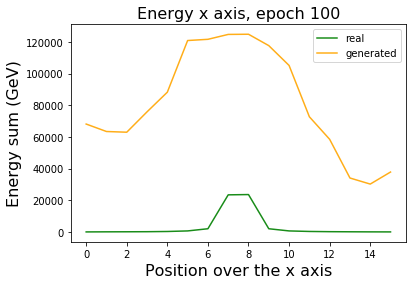

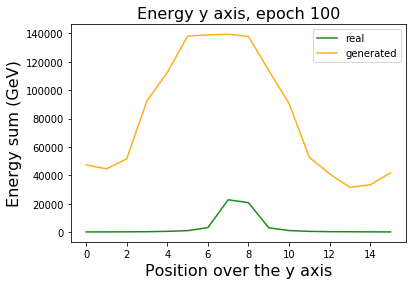

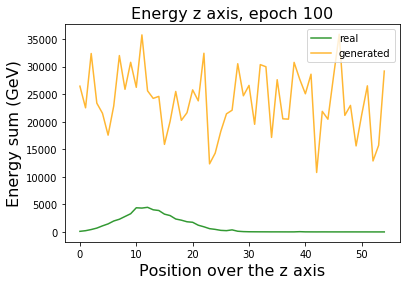

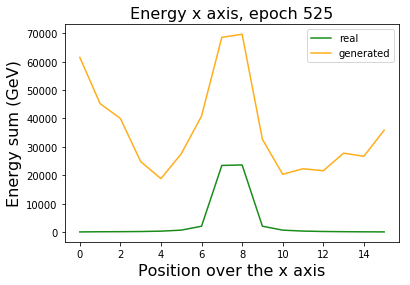

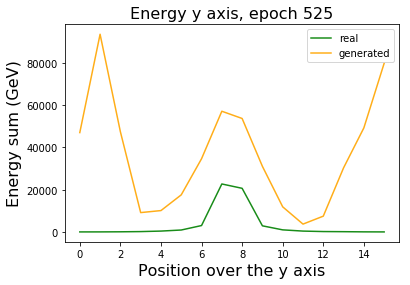

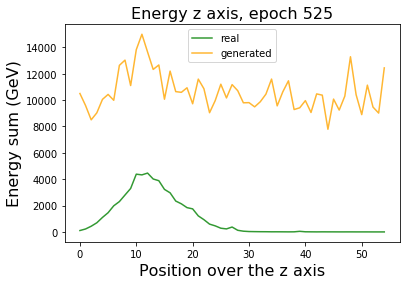

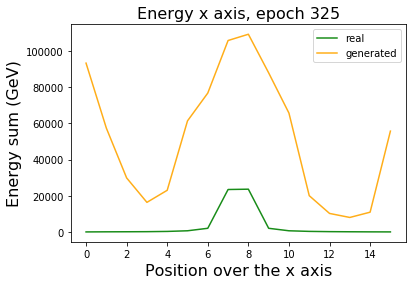

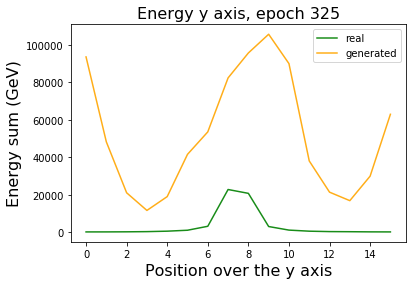

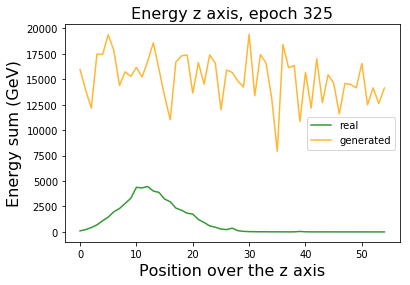

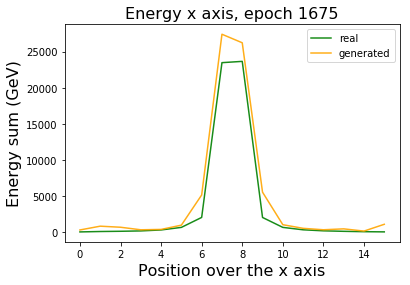

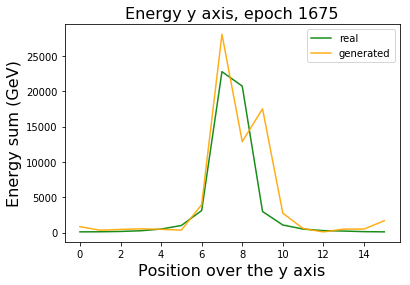

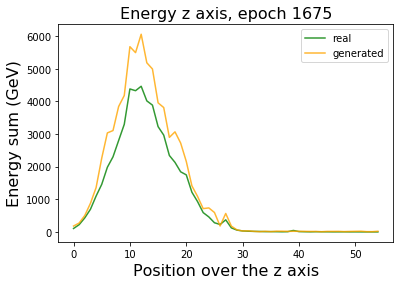

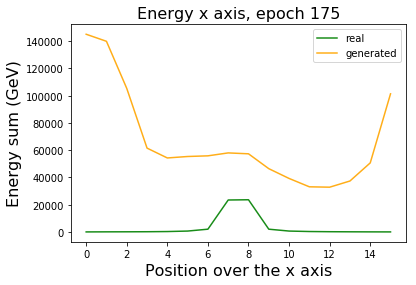

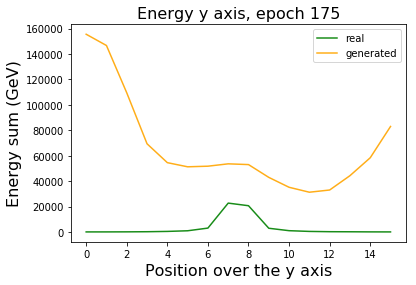

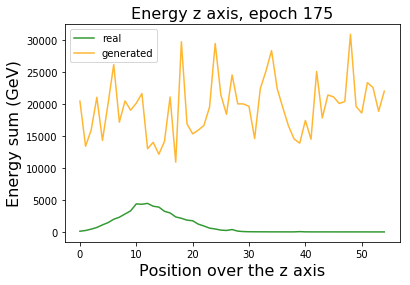

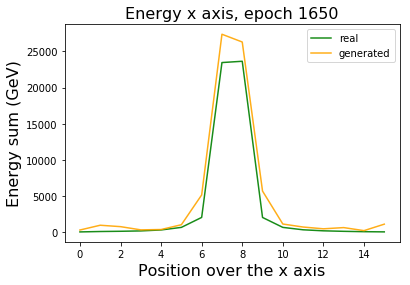

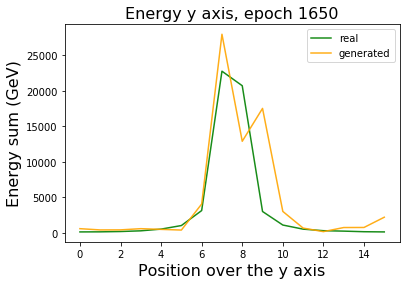

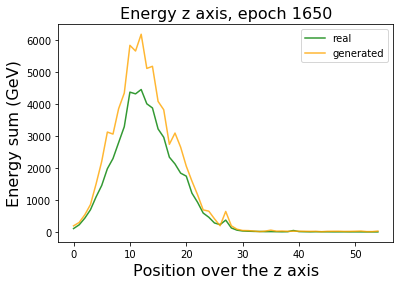

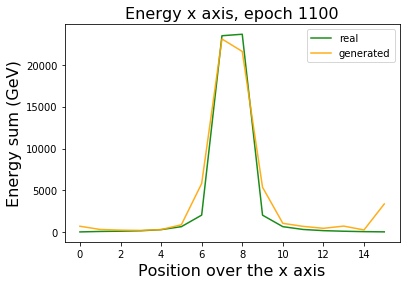

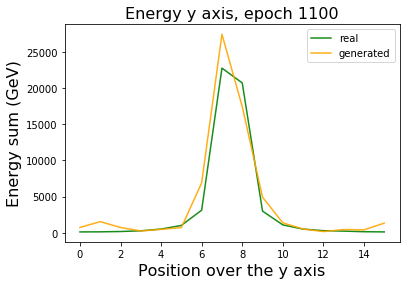

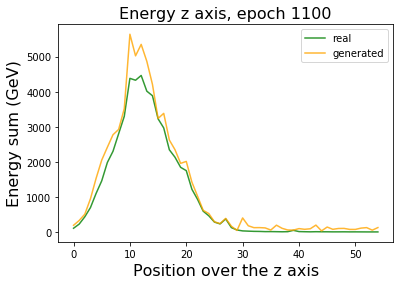

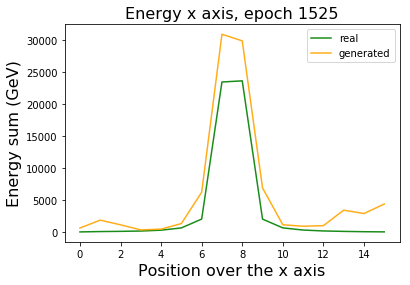

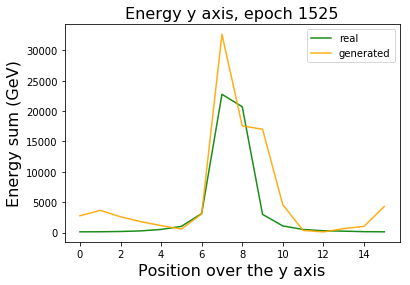

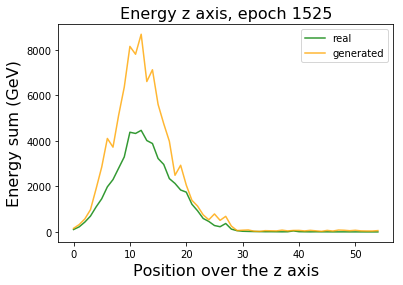

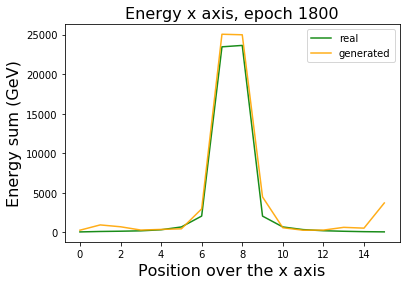

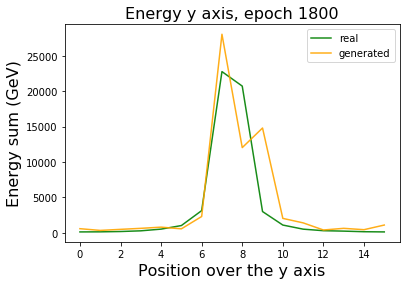

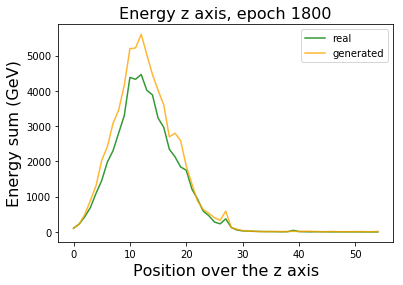

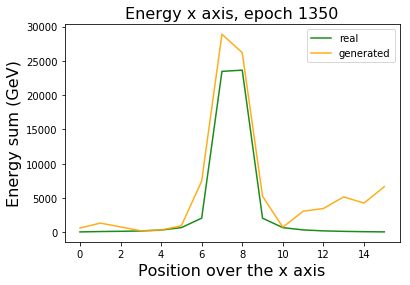

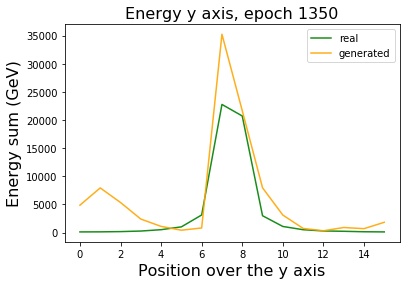

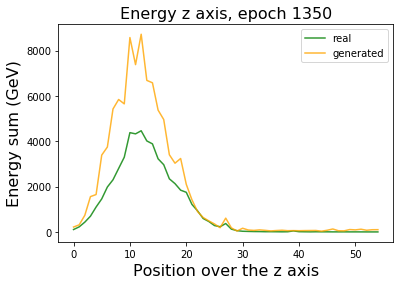

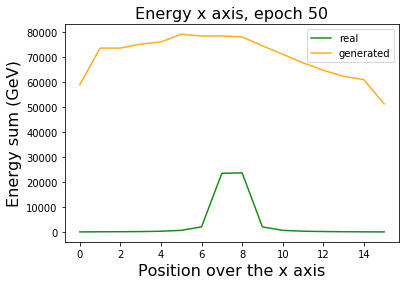

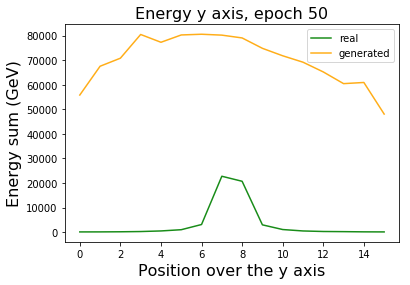

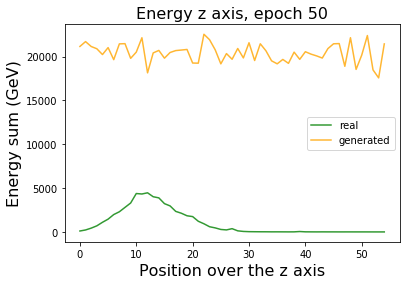

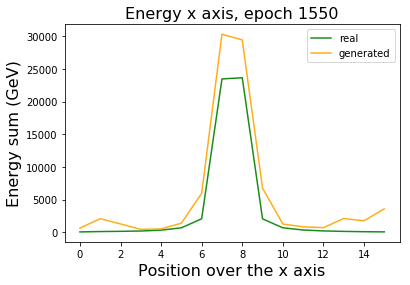

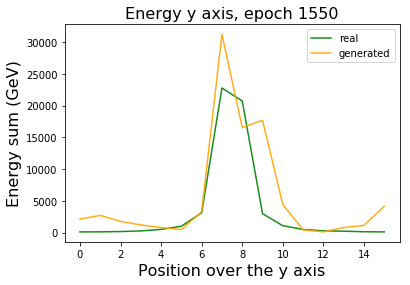

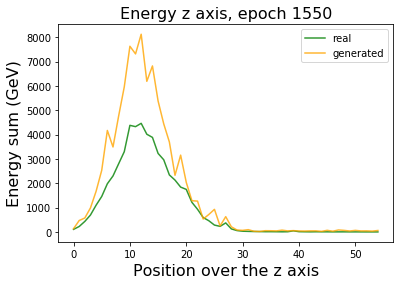

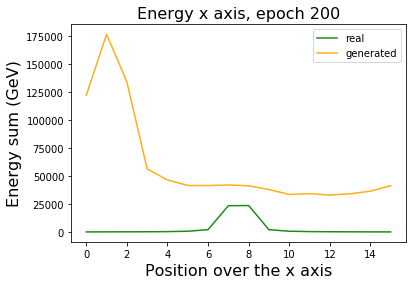

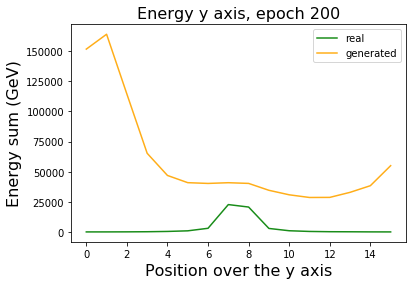

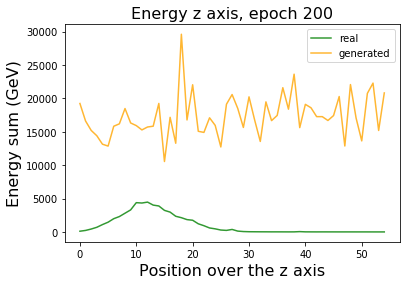

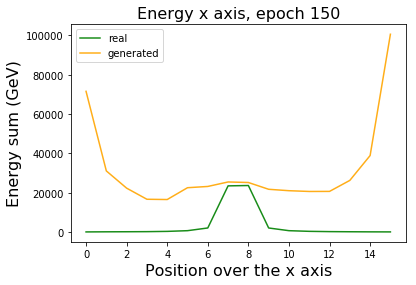

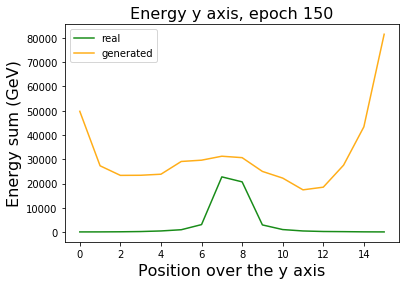

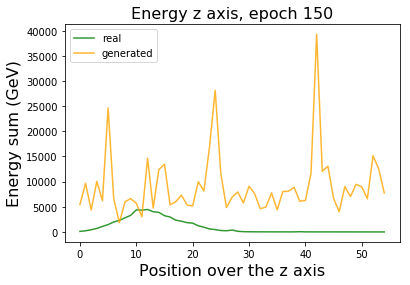

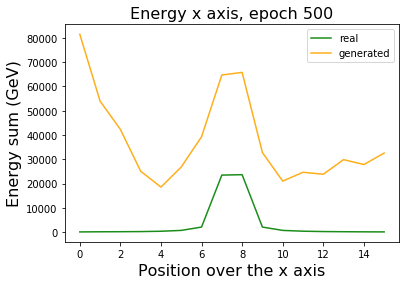

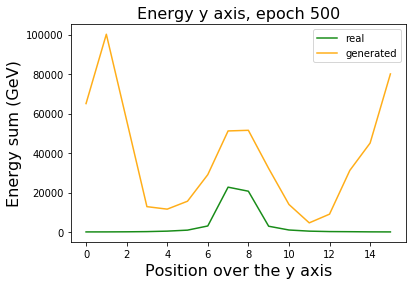

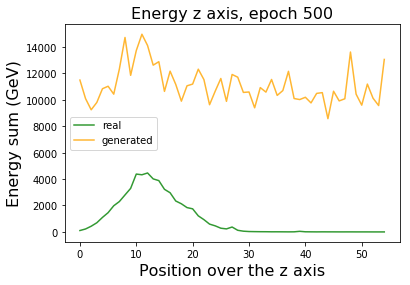

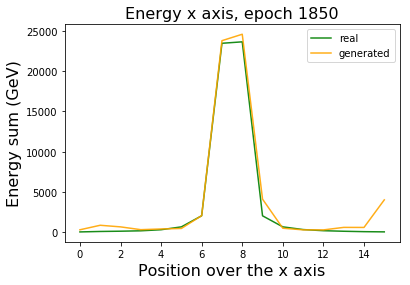

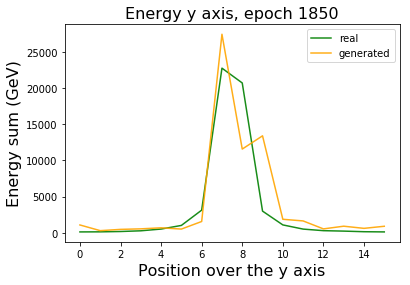

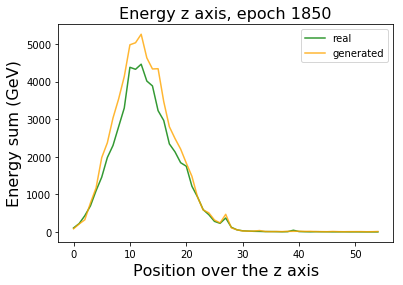

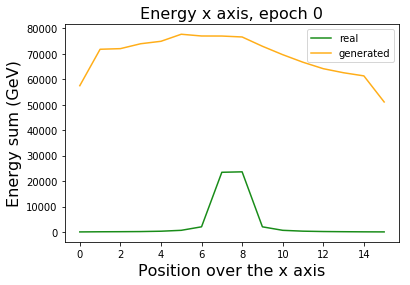

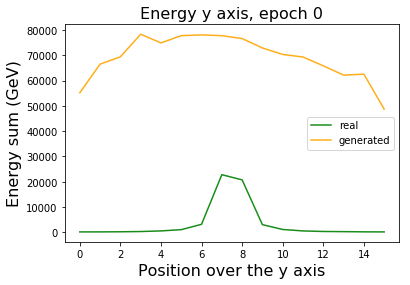

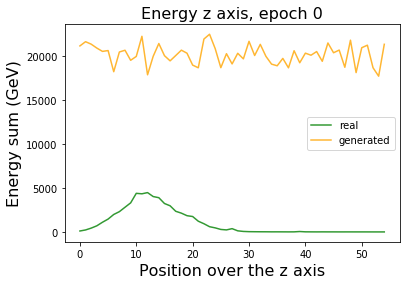

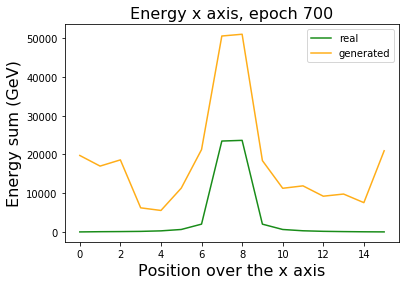

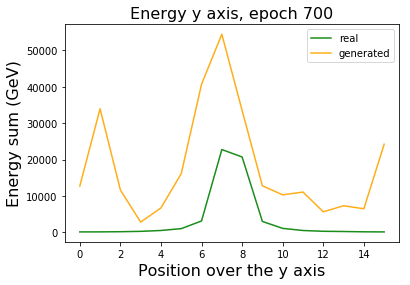

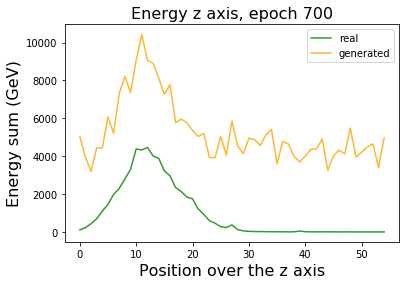

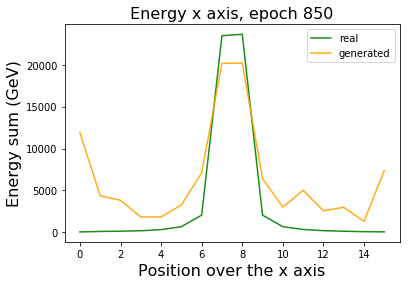

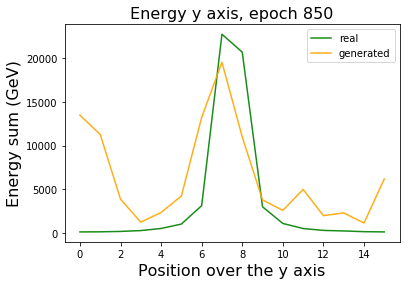

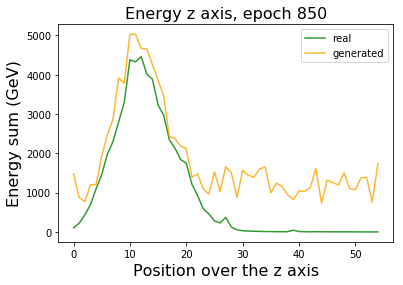

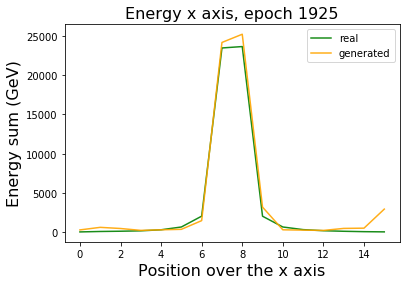

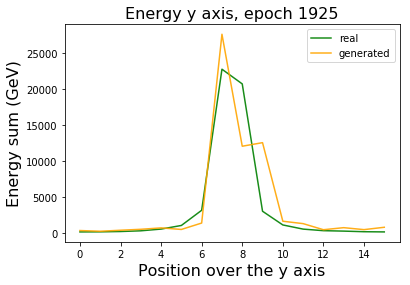

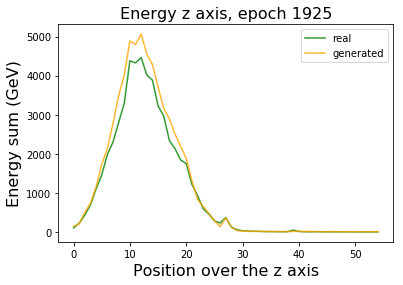

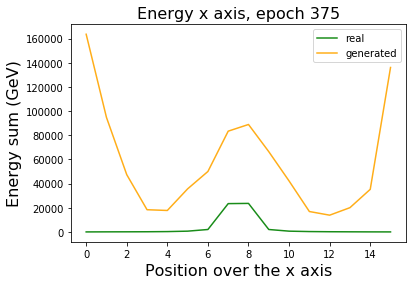

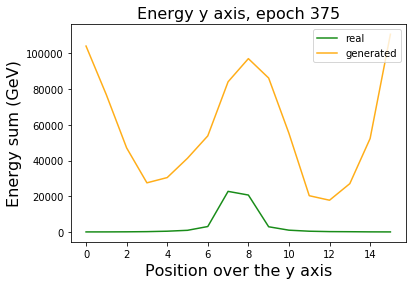

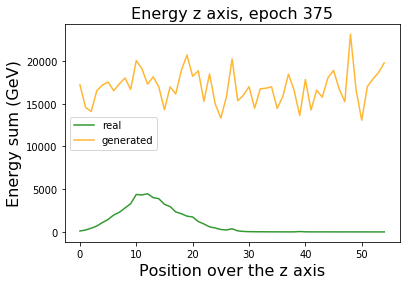

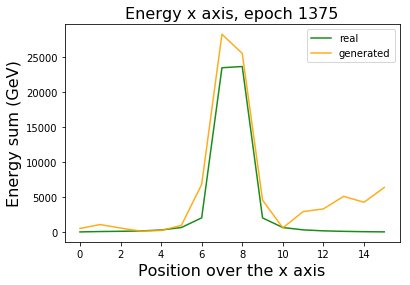

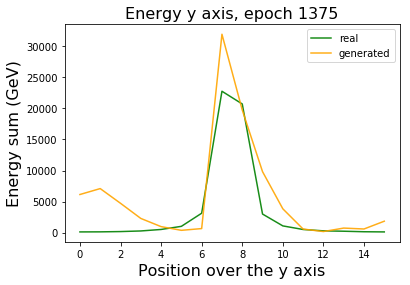

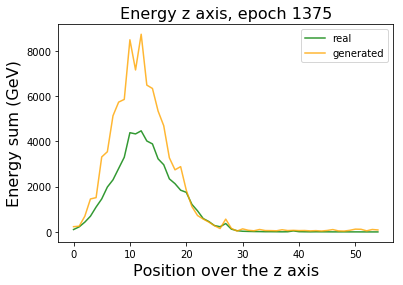

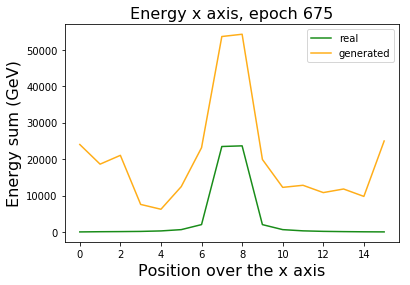

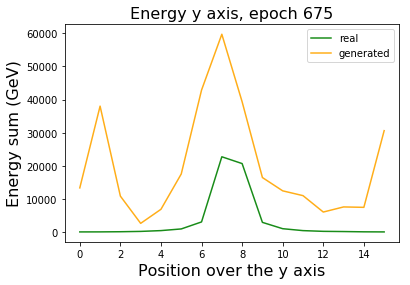

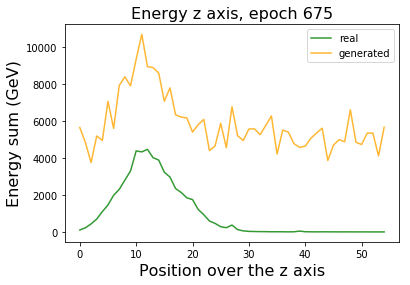

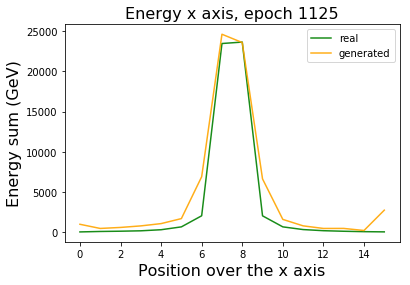

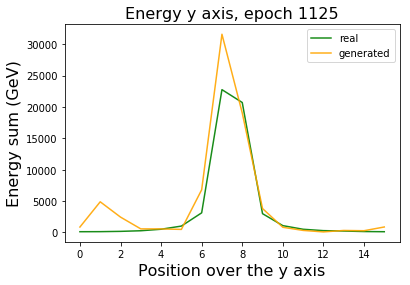

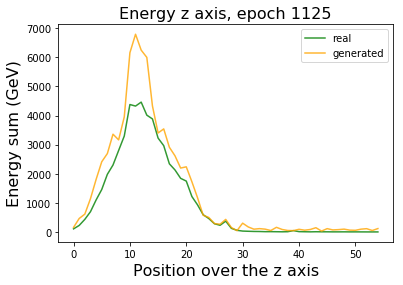

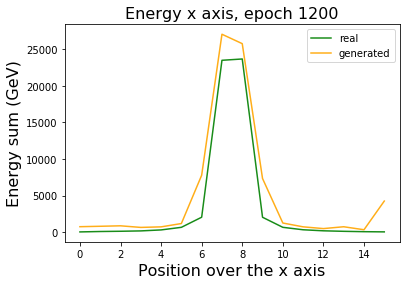

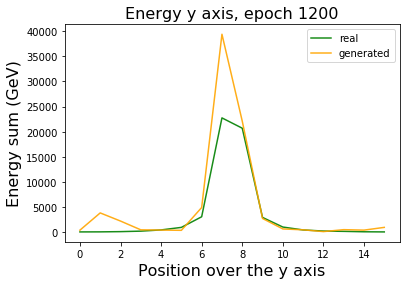

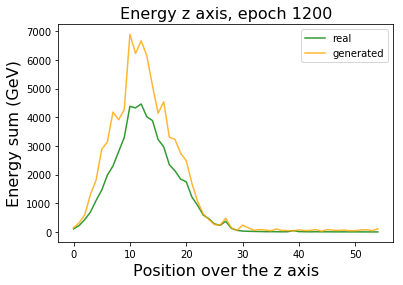

In [5]:
plotAxes(X[0:n_samples], all_g_weight2, gen_model2)

In [40]:
g_weight3 = '/nfshome/vitoriabp/hgcal_wgan/trial28/weights/generator_weights_epoch_1975_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01.h5'
gen_model3 = '/nfshome/vitoriabp/hgcal_wgan/trial28/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01.json'

g = loadModel(gen_model3)
latent_space=100
noise = np.random.normal(0, 1, (n_samples, latent_space))

g.load_weights(g_weight3)

generated_images = g.predict(noise)

Using TensorFlow backend.


In [78]:
def plotX(X, generated_images, ax, epoch='', n_samples=200):
    # Plot sum over X axis:
    x = np.arange(16)
    y_real = np.sum(X[0:n_samples-1], axis=(0, 2, 3))
    y_fake = np.sum(generated_images, axis=(0, 2, 3))
    ax.plot(x, y_real, color="#c65102", label="real", alpha=0.9)
    ax.plot(x, y_fake, color="teal", label="generated", alpha=0.9)
    #plt.xlabel("Position over the x axis", size=16)
    #plt.ylabel("Energy sum (GeV)", size=16)
    #plt.title("x axis", size=16)
    #ax.legend()
    #plt.show()
    #ax.set_title("x")



def plotY(X, generated_images, ax, epoch='', n_samples=200):
    # Plot sum over Y axis:
    x = np.arange(16)
    y_real = np.sum(X[0:n_samples-1], axis=(0, 1, 3))
    y_fake = np.sum(generated_images, axis=(0, 1, 3))
    ax.plot(x, y_real, color="#c65102", label="real", alpha=0.9)
    ax.plot(x, y_fake, color="teal", label="generated", alpha=0.9)
    #plt.xlabel("Position over the y axis", size=16)
    #plt.ylabel("Energy sum (GeV)", size=16)
    #ax.title("y axis", size=16)
    #plt.title("Total energy deposited along the y axis, epoch " + str(epoch), size=16)
    #ax.legend()
    #plt.show()
    #ax.set_title("y")


def plotZ(X, generated_images, ax, epoch = '', n_samples=200):
    # Plot sum over Z axis:
    x = np.arange(55)
    y_real = np.sum(X[0:n_samples-1], axis=(0, 1, 2))
    y_fake = np.sum(generated_images, axis=(0, 1, 2))
    ax.plot(x, y_real, color="#c65102", label="real", alpha=0.9)
    ax.plot(x, y_fake, color="teal", label="generated", alpha=0.9)
    #plt.xlabel("Position over the z axis", size=16)
    #plt.ylabel("Energy sum (GeV)", size=16)
    #ax.title("z axis", size=16)
    #plt.title("Total energy deposited along the z axis, epoch " + str(epoch), size=16)
    #ax.legend()
    #plt.show()

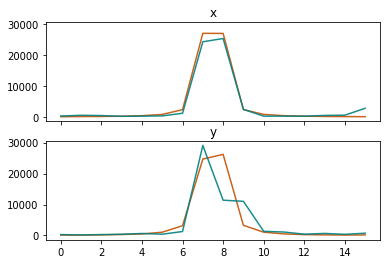

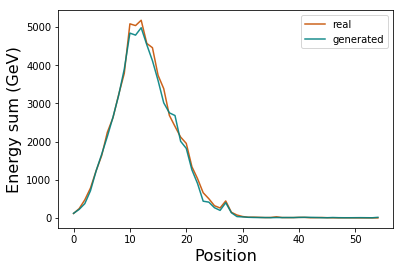

In [85]:
#plt.figure(figsize=(5, 5))

f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)
f, (ax3) = plt.subplots(1, sharex=True, sharey=False)

plotX(X, generated_images, ax1)
plotY(X, generated_images, ax2)
plotZ(X, generated_images, ax3)

ax1.set_title("x")
ax2.set_title("y")

plt.legend()
plt.xlabel("Position", size=16)
plt.ylabel("Energy sum (GeV)", size=16)

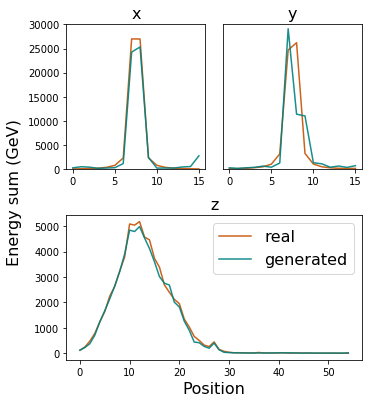

In [166]:
#plt.figure(figsize=(5, 5))

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)    # The big subplot

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

plotX(X, generated_images, ax1)
plotY(X, generated_images, ax2)
plotZ(X, generated_images, ax3)

ax1.set_title("x", size=16)
ax2.set_title("y", size=16)
ax3.set_title("z", size=16)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

ax1.set_ylim(0, 30000)
ax2.set_ylim(0, 30000)
ax2.get_yaxis().set_visible(False)

plt.legend(prop={'size': 16})
ax.set_xlabel("Position", size=16)
ax.set_ylabel("Energy sum (GeV)", size=16)

ax.yaxis.set_label_coords(-0.15, 0.5)

plt.tight_layout()

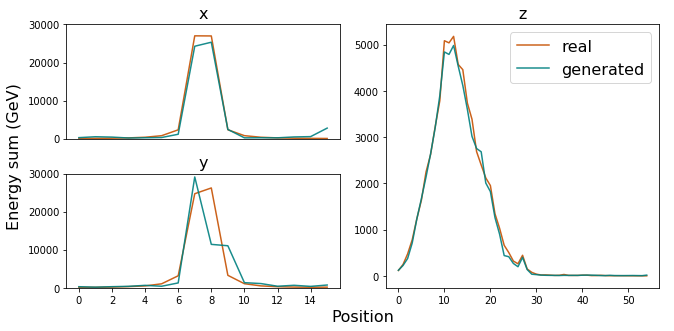

In [159]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)    # The big subplot

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(122)

plotX(X, generated_images, ax1)
plotY(X, generated_images, ax2)
plotZ(X, generated_images, ax3)

ax1.set_title("x", size=16)
ax2.set_title("y", size=16)
ax3.set_title("z", size=16)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

ax1.set_ylim(0, 30000)
ax2.set_ylim(0, 30000)
ax1.get_xaxis().set_visible(False)

ax3.legend(prop={'size': 16})
ax.set_xlabel("Position", size=16)
ax.set_ylabel("Energy sum (GeV)", size=16, va = 'top')
ax.yaxis.set_label_coords(-0.1, 0.5)

plt.tight_layout()

In [86]:
plotX(X, generated_images)

TypeError: plotX() missing 1 required positional argument: 'ax'

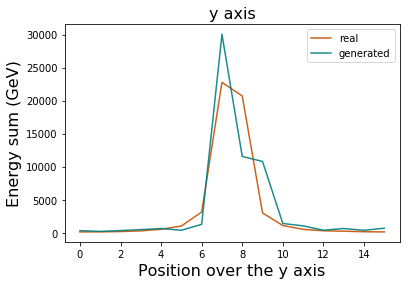

In [48]:
plotY(X, generated_images)

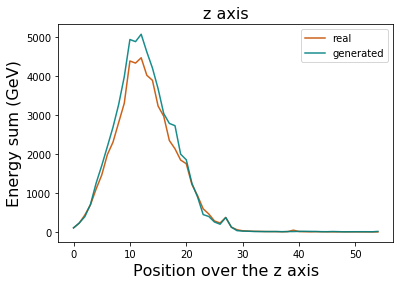

In [49]:
plotZ(X, generated_images)

In [5]:
x = np.arange(16)
y_real = np.sum(X[0:n_samples-1], axis=(0, 2, 3))

In [12]:
true_energy = energy[0:n_samples-1]

In [13]:
true_energy.shape

(199,)

In [14]:
y_real.shape

(16,)

In [16]:
y_real = np.sum(X[0:n_samples-1], axis=(2, 3))

In [17]:
y_real.shape

(199, 16)

In [32]:
y_real.shape

(199, 16)

In [33]:
true_energy.shape

(199,)

In [29]:
y = y_real / true_energy[:, None]

In [34]:
y_r = np.sum(y, axis=0)

In [35]:
y_r.shape

(16,)

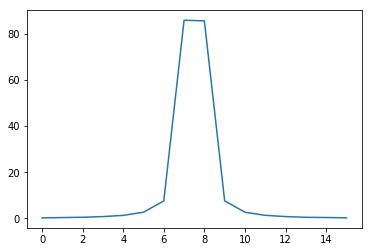

In [36]:
plt.plot(x, y_r)

In [23]:
s = np.sum(y_real, axis=1)

In [24]:
s/true_energy

array([0.96008141, 1.01067651, 0.9976941 , 0.99452647, 1.01364491,
       1.04365081, 1.02410742, 1.0036599 , 0.        , 0.99952646,
       0.97494843, 1.05145513, 1.03531471, 1.07717794, 1.08479795,
       0.98700889, 0.94597215, 0.9862539 , 0.99981199, 1.0173567 ,
       0.99065773, 1.01277025, 0.99472146, 1.02936292, 1.00793278,
       1.00362397, 1.00842316, 0.9625732 , 1.05810614, 0.97396317,
       1.00657167, 1.00869105, 0.99867395, 1.00607123, 1.00575338,
       1.13843712, 1.14062659, 0.98549932, 1.0078808 , 1.02712689,
       1.01135094, 0.95481036, 1.00198477, 0.95704157, 1.14268274,
       1.02050146, 1.00762977, 0.88521346, 1.08710231, 1.02391453,
       1.00076391, 1.05475904, 0.9386996 , 0.91340122, 1.06640608,
       0.        , 0.99509977, 0.9823045 , 1.01161   , 0.99321854,
       1.030542  , 0.95819356, 0.95539234, 0.99072014, 1.02590809,
       0.99891383, 0.9747667 , 0.90636348, 1.01363688, 0.96858065,
       0.98057615, 0.9910146 , 0.99620447, 1.05535207, 0.99999

(array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   5., 177.,  15.]),
 array([0.        , 0.11675921, 0.23351842, 0.35027763, 0.46703684,
        0.58379605, 0.70055526, 0.81731447, 0.93407368, 1.05083289,
        1.1675921 ]),
 <a list of 10 Patch objects>)

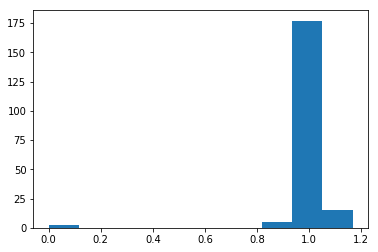

In [25]:
plt.hist(s/true_energy)

In [22]:
y_real[:, 0]/true_energy

array([1.12716459e-03, 7.35235546e-04, 3.74059537e-04, 1.22535642e-03,
       8.93640909e-04, 8.21174577e-04, 7.42171245e-04, 2.46453446e-03,
       0.00000000e+00, 1.34486728e-03, 1.19145047e-03, 1.68097980e-03,
       9.91031113e-04, 5.41987750e-04, 4.10602050e-03, 1.72448840e-04,
       1.91362310e-03, 1.29835271e-04, 1.27175957e-03, 4.74524965e-04,
       1.57877745e-03, 1.56487349e-04, 1.56922296e-03, 6.53477846e-04,
       6.82022845e-04, 6.78570777e-04, 6.10730692e-04, 2.98946469e-03,
       2.41500316e-03, 7.34975319e-04, 1.08037679e-03, 2.08635523e-04,
       2.21382672e-04, 8.44105948e-04, 8.29836182e-04, 5.47019324e-04,
       1.24632657e-03, 2.43033233e-04, 1.20380467e-03, 7.65610845e-04,
       2.88261840e-03, 3.21262872e-04, 1.46641035e-03, 0.00000000e+00,
       8.27710555e-03, 3.32518677e-04, 4.28341904e-04, 5.78343601e-04,
       7.17317961e-03, 6.97561122e-04, 6.03311881e-04, 6.25571832e-04,
       1.62886466e-03, 0.00000000e+00, 1.01251167e-02, 0.00000000e+00,
      

In [15]:
plt.plot(x, y_real/energy)

ValueError: operands could not be broadcast together with shapes (16,) (155145,) 

In [ ]:
def plotX_norm(X, generated_images, true_energy epoch='', n_samples=200):
    # Plot sum over X axis:
    x = np.arange(16)
    y_real = np.sum(X[0:n_samples-1], axis=(0, 2, 3))
    y_fake = np.sum(generated_images, axis=(0, 2, 3))
    plt.plot(x, y_real, color="#c65102", label="real", alpha=0.9)
    plt.plot(x, y_fake, color="teal", label="generated", alpha=0.9)
    plt.xlabel("Position over the x axis", size=16)
    plt.ylabel("Energy sum (GeV)", size=16)
    plt.title("x axis", size=16)
    plt.legend()
    plt.show()


def plotY_norm(X, generated_images, epoch='', n_samples=200):
    # Plot sum over Y axis:
    x = np.arange(16)
    y_real = np.sum(X[0:n_samples-1], axis=(0, 1, 3))
    y_fake = np.sum(generated_images, axis=(0, 1, 3))
    plt.plot(x, y_real, color="#c65102", label="real", alpha=0.9)
    plt.plot(x, y_fake, color="teal", label="generated", alpha=0.9)
    plt.xlabel("Position over the y axis", size=16)
    plt.ylabel("Energy sum (GeV)", size=16)
    plt.title("y axis", size=16)
    #plt.title("Total energy deposited along the y axis, epoch " + str(epoch), size=16)
    plt.legend()
    plt.show()


def plotZ_norm(X, generated_images, epoch = '', n_samples=200):
    # Plot sum over Z axis:
    x = np.arange(55)
    y_real = np.sum(X[0:n_samples-1], axis=(0, 1, 2))
    y_fake = np.sum(generated_images, axis=(0, 1, 2))
    plt.plot(x, y_real, color="#c65102", label="real", alpha=0.9)
    plt.plot(x, y_fake, color="teal", label="generated", alpha=0.9)
    plt.xlabel("Position over the z axis", size=16)
    plt.ylabel("Energy sum (GeV)", size=16)
    plt.title("z axis", size=16)
    #plt.title("Total energy deposited along the z axis, epoch " + str(epoch), size=16)
    plt.legend()
    plt.show()